# **EDA**

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_csv('../data/processed/smartphone_cleaned_v2.csv')

pd.set_option('display.max_columns',None)
df.head(6)

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,processor_name,processor_core,processor_speed,ram_capacity,base_memory,battery_capacity,fast_charging,screen_size,resolution,refresh_rate,num_rear_cam,num_front_cam,extended_memory,os,primary_camera_rear,primary_camera_front
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,Snapdragon 8 Gen2,Octa Core,3.2,12.0,256,5000.0,100,6.70,1440 x 3216,120,3,1,0,android,50,16
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,Snapdragon 695,Octa Core,2.2,6.0,128,5000.0,33,6.59,1080 x 2412,120,3,1,1 TB,android,64,16
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,Exynos 1330,Octa Core,2.4,4.0,64,5000.0,15,6.60,1080 x 2408,90,3,1,1 TB,android,50,13
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,Snapdragon 695,Octa Core,2.2,6.0,128,5000.0,0,6.55,1080 x 2400,120,3,1,1 TB,android,50,16
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,Dimensity 1080,Octa Core,2.6,6.0,128,5000.0,67,6.70,1080 x 2412,120,3,1,0,android,108,16
5,samsung,Samsung Galaxy F23 5G (6GB RAM + 128GB),16999,80.0,True,True,False,snapdragon,Snapdragon 750G,Octa Core,2.2,6.0,128,5000.0,25,6.60,1080 x 2408,120,3,1,1 TB,android,50,8


In [18]:
df.shape

(980, 24)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand_name            980 non-null    object 
 1   model                 980 non-null    object 
 2   price                 980 non-null    int64  
 3   rating                879 non-null    float64
 4   has_5g                980 non-null    bool   
 5   has_nfc               980 non-null    bool   
 6   has_ir_blaster        980 non-null    bool   
 7   processor_brand       980 non-null    object 
 8   processor_name        960 non-null    object 
 9   processor_core        974 non-null    object 
 10  processor_speed       938 non-null    float64
 11  ram_capacity          980 non-null    float64
 12  base_memory           980 non-null    int64  
 13  battery_capacity      969 non-null    float64
 14  fast_charging         980 non-null    int64  
 15  screen_size           9

In [20]:
print(df.isnull().sum())

brand_name                0
model                     0
price                     0
rating                  101
has_5g                    0
has_nfc                   0
has_ir_blaster            0
processor_brand           0
processor_name           20
processor_core            6
processor_speed          42
ram_capacity              0
base_memory               0
battery_capacity         11
fast_charging             0
screen_size               0
resolution                0
refresh_rate              0
num_rear_cam              0
num_front_cam             0
extended_memory           0
os                        0
primary_camera_rear       0
primary_camera_front      9
dtype: int64


## Univariate Analysis

<Axes: xlabel='brand_name'>

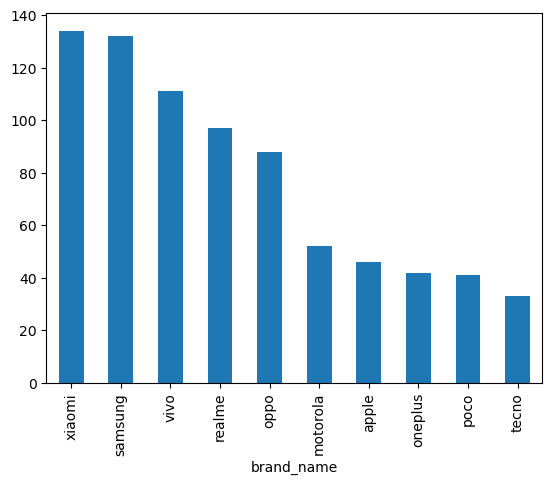

In [22]:
# Top 10 phone brands (based on number of products)

df['brand_name'].value_counts().head(10).plot(kind='bar')

In [23]:
'''

price col

'''

'\n\nprice col\n\n'

In [24]:
df['price'].describe()

count       980.000000
mean      32520.504082
std       39531.812669
min        3499.000000
25%       12999.000000
50%       19994.500000
75%       35491.500000
max      650000.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Density'>

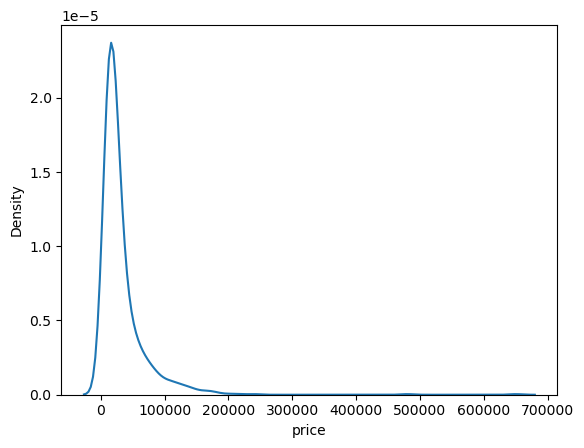

In [25]:
sns.kdeplot(df['price'])

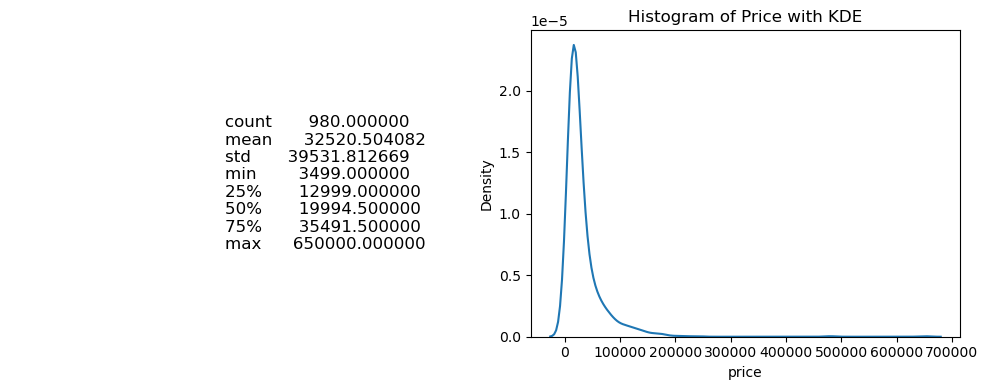

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig = plt.figure(figsize=(10, 4))

# Subplot 1: Summary statistics
ax1 = fig.add_subplot(1, 2, 1)
stats = df['price'].describe().to_string()
ax1.text(0.5, 0.5, stats, fontsize=12, va='center')
ax1.axis('off')

# Subplot 2: KDE
ax2 = fig.add_subplot(1, 2, 2)
sns.kdeplot(df['price'], ax=ax2)
ax2.set_title('Histogram of Price with KDE')

plt.tight_layout()
plt.show()

In [27]:
df['price'].skew()  # positively skewed

6.591790999665567

<Axes: xlabel='price'>

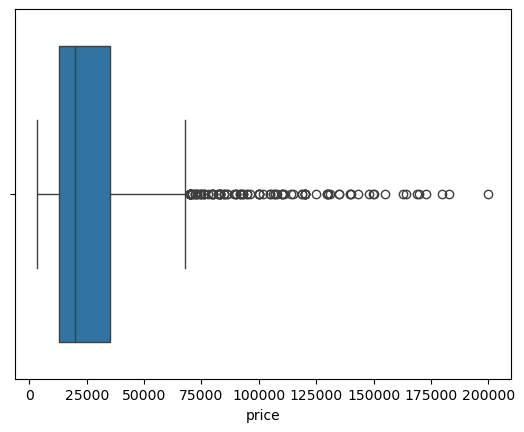

In [28]:
sns.boxplot(df[df['price']<200000]['price'], orient='h')

In [29]:
df[df['price']>200000]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,processor_name,processor_core,processor_speed,ram_capacity,base_memory,battery_capacity,fast_charging,screen_size,resolution,refresh_rate,num_rear_cam,num_front_cam,extended_memory,os,primary_camera_rear,primary_camera_front
427,vertu,Vertu Signature Touch,650000,62.0,False,True,False,snapdragon,Snapdragon 801,Octa Core,1.50,2.0,64,2275.0,-1,4.70,1080 x 1920,60,1,1,0,android,13,2.1
478,huawei,Huawei Mate 50 RS Porsche Design,239999,81.0,False,True,True,snapdragon,Snapdragon 8+ Gen1,Octa Core,3.20,12.0,512,4700.0,66,6.74,1212 x 2616,120,3,1,256 GB,other,50,13
887,xiaomi,Xiaomi Redmi K20 Pro Signature Edition,480000,88.0,False,True,False,snapdragon,Snapdragon 855,Octa Core,2.80,8.0,256,4000.0,27,6.39,1080 x 2340,60,3,1,0,android,48,20
951,huawei,Huawei Mate 30 RS Porsche Design,214990,NaN,True,True,True,kirin,Kirin 990,Octa Core,2.86,12.0,512,4500.0,0,6.53,1176 x 2400,60,4,2,256 GB,android,40,32


In [30]:
df['price'].isnull().sum()

0

In [31]:
'''

rating col

'''

'\n\nrating col\n\n'

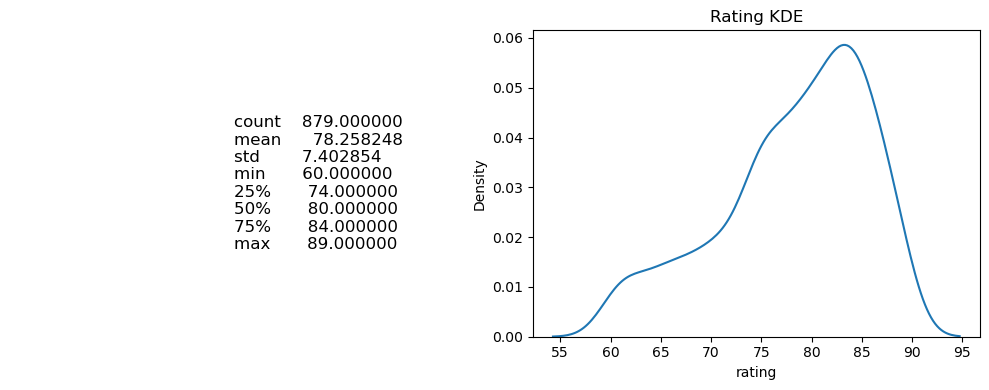

In [32]:
fig = plt.figure(figsize=(10, 4))

# Subplot 1: Summary statistics
ax1 = fig.add_subplot(1, 2, 1)
stats = df['rating'].describe().to_string()
ax1.text(0.5, 0.5, stats, fontsize=12, va='center')
ax1.axis('off')

# Subplot 2: KDE
ax2 = fig.add_subplot(1, 2, 2)
sns.kdeplot(df['rating'], ax=ax2)
ax2.set_title('Rating KDE')

plt.tight_layout()
plt.show()

In [33]:
df['rating'].describe()

count    879.000000
mean      78.258248
std        7.402854
min       60.000000
25%       74.000000
50%       80.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

<Axes: xlabel='rating', ylabel='Density'>

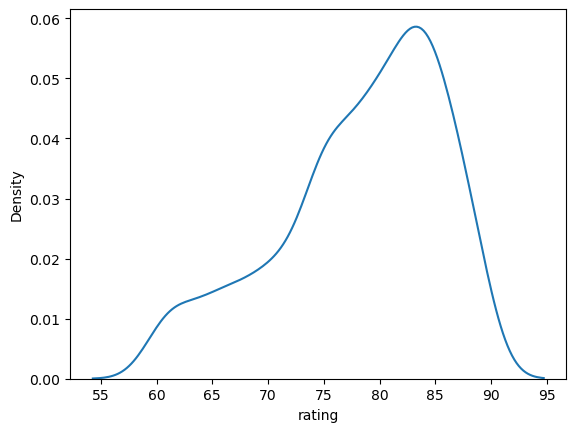

In [34]:
sns.kdeplot(df['rating'])

In [35]:
df['rating'].skew()  # negatively skewed

-0.6989993034105535

<Axes: xlabel='rating'>

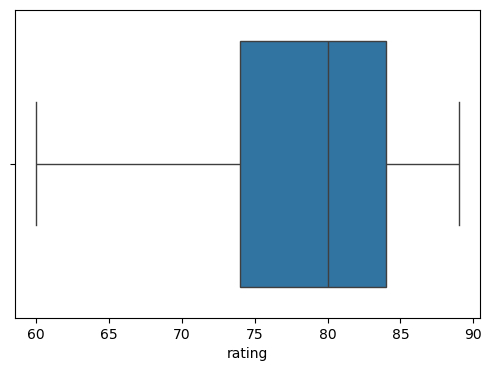

In [36]:
plt.figure(figsize=(6, 4))

sns.boxplot(df['rating'], orient='h')

In [37]:
df['rating'].isnull().sum()

101

In [38]:
'''

has_5g

'''

'\n\nhas_5g\n\n'

In [39]:
df['has_5g'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 980 entries, 0 to 979
Series name: has_5g
Non-Null Count  Dtype
--------------  -----
980 non-null    bool 
dtypes: bool(1)
memory usage: 1.1 KB


In [40]:
df['has_5g'].value_counts()

has_5g
True     549
False    431
Name: count, dtype: int64

<Axes: xlabel='has_5g'>

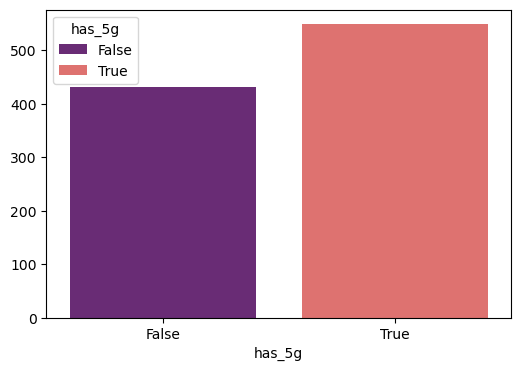

In [41]:
plt.figure(figsize=(6, 4))

sns.barplot(x = df['has_5g'].value_counts().index, y = df['has_5g'].value_counts().values, hue = df['has_5g'].value_counts().index, palette = 'magma')

In [42]:
'''

has_nfc

'''

'\n\nhas_nfc\n\n'

In [43]:
df['has_nfc'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 980 entries, 0 to 979
Series name: has_nfc
Non-Null Count  Dtype
--------------  -----
980 non-null    bool 
dtypes: bool(1)
memory usage: 1.1 KB


In [44]:
df['has_nfc'].value_counts()

has_nfc
False    587
True     393
Name: count, dtype: int64

<Axes: xlabel='has_nfc'>

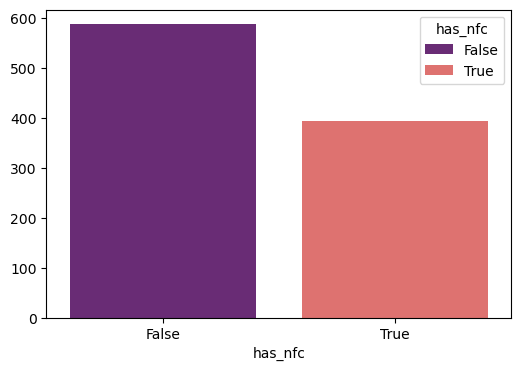

In [45]:
plt.figure(figsize=(6, 4))

sns.barplot(x = df['has_nfc'].value_counts().index, y = df['has_nfc'].value_counts().values, hue = df['has_nfc'].value_counts().index, palette = 'magma')

In [46]:
'''

has_ir_blaster

'''

'\n\nhas_ir_blaster\n\n'

In [47]:
df['has_ir_blaster'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 980 entries, 0 to 979
Series name: has_ir_blaster
Non-Null Count  Dtype
--------------  -----
980 non-null    bool 
dtypes: bool(1)
memory usage: 1.1 KB


In [48]:
df['has_ir_blaster'].value_counts()

has_ir_blaster
False    821
True     159
Name: count, dtype: int64

<Axes: xlabel='has_ir_blaster'>

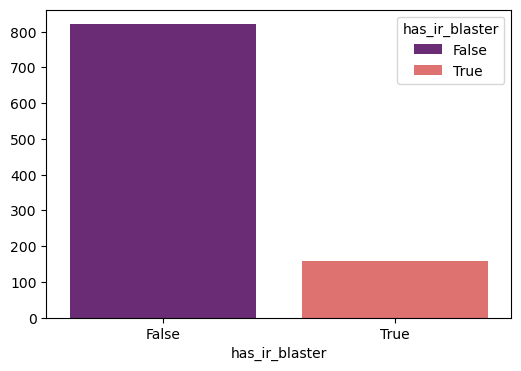

In [49]:
plt.figure(figsize=(6, 4))

sns.barplot(x = df['has_ir_blaster'].value_counts().index, y = df['has_ir_blaster'].value_counts().values, hue = df['has_ir_blaster'].value_counts().index, palette = 'magma')

In [50]:
'''

processor_brand

'''

'\n\nprocessor_brand\n\n'

In [51]:
df['processor_brand'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 980 entries, 0 to 979
Series name: processor_brand
Non-Null Count  Dtype 
--------------  ----- 
980 non-null    object
dtypes: object(1)
memory usage: 7.8+ KB


In [52]:
print(df['processor_brand'].value_counts())

processor_brand
snapdragon    407
helio         201
dimensity     177
exynos         49
bionic         39
unisoc         26
tiger          24
octa           14
google          9
kirin           7
quad            6
qualcomm        5
a13             5
spreadtrum      4
sc9863a         2
apple           1
sanpdragon      1
fusion          1
(28             1
samsung         1
Name: count, dtype: int64


In [53]:
df['processor_brand'] = df['processor_brand'].str.replace('sanpdragon','snapdragon')
df['processor_brand'] = df['processor_brand'].str.replace('apple','bionic')  # apple processors are reffered as bionic
df['processor_brand'] = df['processor_brand'].str.replace('samsung','exynos')  # samsung processor is also reffered as exynos

In [54]:
temp_df = df[df['processor_brand'] == 'qualcomm']

In [55]:
df.loc[temp_df.index, 'processor_brand'] = 'snapdragon'

In [56]:
temp_df = df[df['processor_brand'] == 'a13']

In [57]:
df.loc[temp_df.index, 'processor_brand'] = 'bionic'

In [58]:
df['processor_brand'].isnull().sum()

0

In [59]:
df.sample(6)

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,processor_name,processor_core,processor_speed,ram_capacity,base_memory,battery_capacity,fast_charging,screen_size,resolution,refresh_rate,num_rear_cam,num_front_cam,extended_memory,os,primary_camera_rear,primary_camera_front
458,xiaomi,Xiaomi Mi Mix Alpha,199990,NaN,True,False,False,snapdragon,Snapdragon 855+,Octa Core,2.96,12.0,512,4050.0,40,7.92,2088 x 2250,60,3,Missing,0,android,108,NaN
243,google,Google Pixel 7 5G,53100,86.0,True,True,False,google,Google Tensor G2,Octa Core,2.85,8.0,128,4355.0,30,6.30,1080 x 2400,90,2,1,0,android,50,10.8
673,samsung,Samsung Galaxy A24,17999,77.0,False,False,False,exynos,Exynos 7904,Octa Core,1.80,6.0,64,4000.0,15,6.40,1080 x 2408,60,3,1,1 TB,android,48,16
879,oneplus,OnePlus Nord N100,16990,68.0,False,False,False,snapdragon,Snapdragon 460,Octa Core,1.80,4.0,64,5000.0,18,6.52,720 x 1600,90,3,1,256 GB,android,13,8
979,samsung,Samsung Galaxy M52s 5G,24990,74.0,True,False,False,octa,NaN,Octa Core,NaN,8.0,128,5000.0,0,6.50,1080 x 2400,60,3,1,1 TB,android,64,32
681,oppo,Oppo Find N 5G,92249,NaN,True,True,False,snapdragon,Snapdragon 888,Octa Core,2.84,8.0,256,4500.0,33,7.10,1792 x 1920,120,3,1,0,android,50,32


In [60]:
print(df['processor_brand'].value_counts())

processor_brand
snapdragon    413
helio         201
dimensity     177
exynos         50
bionic         45
unisoc         26
tiger          24
octa           14
google          9
kirin           7
quad            6
spreadtrum      4
sc9863a         2
fusion          1
(28             1
Name: count, dtype: int64


In [61]:
df['processor_brand'] = df['processor_brand'].str.strip()

In [62]:
temp_df = df[df['processor_brand'] == '(28']

df.loc[temp_df.index, 'processor_brand'] = 'Mediatek'

In [63]:
print('\033[1m Top 10 processor brands \033[0m')
print(df['processor_brand'].value_counts().head(10))

 Top 10 processor brands 
processor_brand
snapdragon    413
helio         201
dimensity     177
exynos         50
bionic         45
unisoc         26
tiger          24
octa           14
google          9
kirin           7
Name: count, dtype: int64


<Axes: xlabel='processor_brand'>

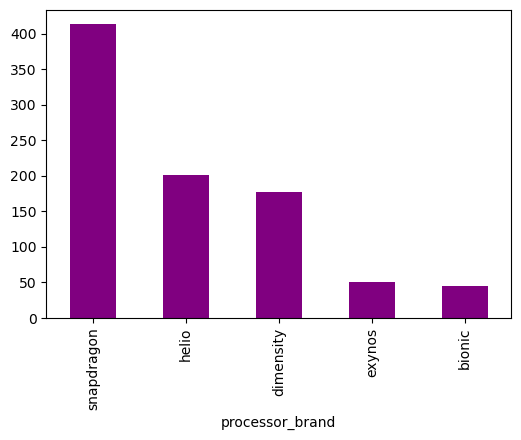

In [64]:
# Top 5 processor brand

plt.figure(figsize=(6, 4))

df['processor_brand'].value_counts().head(5).plot(kind='bar', color = 'purple')

In [65]:
'''

processor_core

'''

'\n\nprocessor_core\n\n'

In [66]:
df['processor_core'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 980 entries, 0 to 979
Series name: processor_core
Non-Null Count  Dtype 
--------------  ----- 
974 non-null    object
dtypes: object(1)
memory usage: 7.8+ KB


In [67]:
df['processor_core'].value_counts()

processor_core
Octa Core    899
Hexa Core     39
Quad Core     36
Name: count, dtype: int64

<Axes: xlabel='processor_core'>

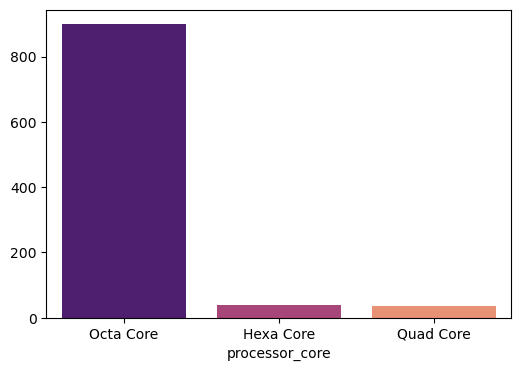

In [68]:
plt.figure(figsize=(6, 4))

sns.barplot(x = df['processor_core'].value_counts().index, y = df['processor_core'].value_counts().values, hue = df['processor_core'].value_counts().index, palette = 'magma')

In [69]:
def pc_function(text):
    if pd.notna(text):
        if 'Octa Core' in text:
            return 8
        elif 'Hexa Core' in text:
            return 6
        elif 'Quad Core' in text:
            return 4
        else:
            return text
    else:
        return text

In [70]:
df['num_cores'] = df['processor_core'].apply(pc_function)

In [71]:
'''

processor_speed

'''

'\n\nprocessor_speed\n\n'

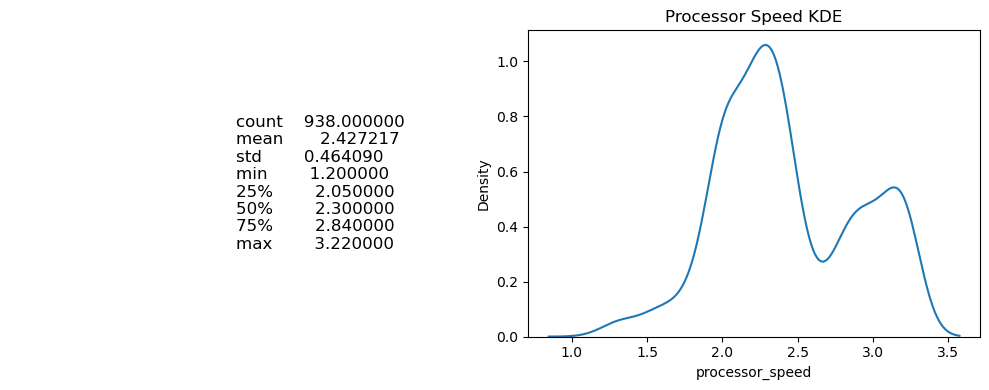

In [72]:
fig = plt.figure(figsize=(10, 4))

# Subplot 1: Summary statistics
ax1 = fig.add_subplot(1, 2, 1)
stats = df['processor_speed'].describe().to_string()
ax1.text(0.5, 0.5, stats, fontsize=12, va='center')
ax1.axis('off')

# Subplot 2: KDE
ax2 = fig.add_subplot(1, 2, 2)
sns.kdeplot(df['processor_speed'], ax=ax2)
ax2.set_title('Processor Speed KDE')

plt.tight_layout()
plt.show()

In [73]:
df['processor_speed'].skew()

0.18833557463624606

<Axes: xlabel='processor_speed'>

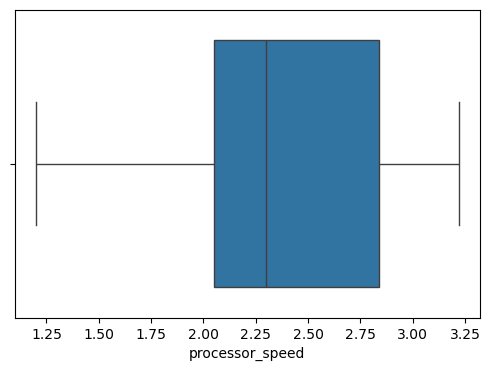

In [74]:
plt.figure(figsize=(6, 4))

sns.boxplot(df['processor_speed'], orient='h')

In [75]:
'''

ram_capacity

'''

'\n\nram_capacity\n\n'

In [76]:
print(df['ram_capacity'].value_counts().sort_index(ascending = True))

ram_capacity
1.0       7
2.0      32
3.0      54
4.0     215
6.0     234
8.0     339
12.0     86
16.0      9
18.0      2
64.0      2
Name: count, dtype: int64


<Axes: xlabel='ram_capacity'>

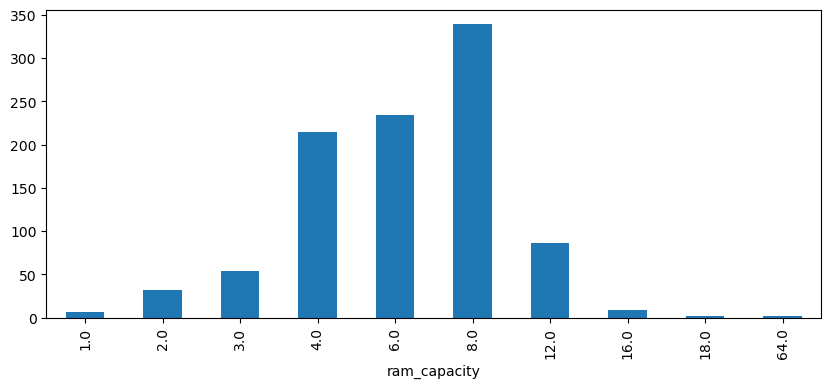

In [77]:
plt.figure(figsize=(10, 4))

df['ram_capacity'].value_counts().sort_index(ascending = True).plot(kind='bar')

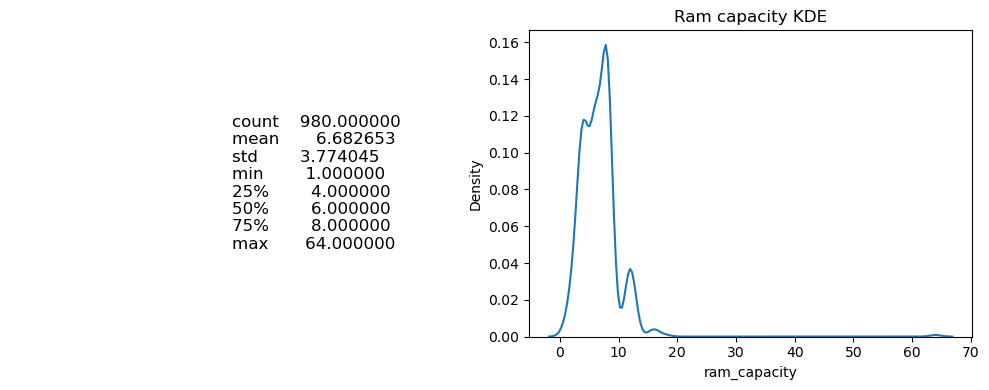

In [78]:
fig = plt.figure(figsize=(10, 4))

# Subplot 1: Summary statistics
ax1 = fig.add_subplot(1, 2, 1)
stats = df['ram_capacity'].describe().to_string()
ax1.text(0.5, 0.5, stats, fontsize=12, va='center')
ax1.axis('off')

# Subplot 2: KDE
ax2 = fig.add_subplot(1, 2, 2)
sns.kdeplot(df['ram_capacity'], ax=ax2)
ax2.set_title('Ram capacity KDE')

plt.tight_layout()
plt.show()

In [79]:
df['ram_capacity'].skew()  # positively skewed

7.406797531322625

<Axes: xlabel='ram_capacity'>

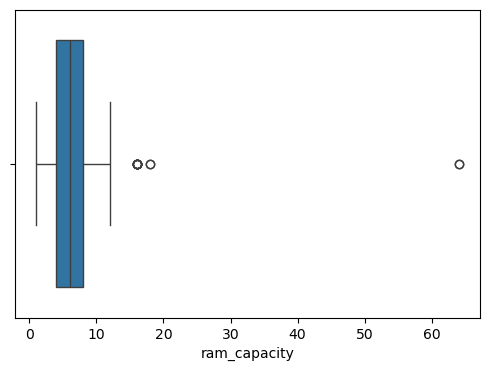

In [80]:
plt.figure(figsize=(6, 4))

sns.boxplot(df['ram_capacity'], orient='h')

In [81]:
df.sample(2)

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,processor_name,processor_core,processor_speed,ram_capacity,base_memory,battery_capacity,fast_charging,screen_size,resolution,refresh_rate,num_rear_cam,num_front_cam,extended_memory,os,primary_camera_rear,primary_camera_front,num_cores
916,vivo,Vivo X Fold 5G (12GB RAM + 512GB),118990,NaN,True,True,False,snapdragon,Snapdragon 8 Gen1,Octa Core,3.0,12.0,512,4600.0,66,8.03,1916 x 2160,120,4,1,0,android,50,16,8.0
699,asus,Asus ROG Phone 6D Ultimate,107990,NaN,True,True,False,dimensity,Dimensity 9000 Plus,Octa Core,3.2,16.0,512,6000.0,65,6.78,1080 x 2448,165,3,1,0,Not Specified,50,12,8.0


In [82]:
'''

base_memory

'''

'\n\nbase_memory\n\n'

In [83]:
df['base_memory'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 980 entries, 0 to 979
Series name: base_memory
Non-Null Count  Dtype
--------------  -----
980 non-null    int64
dtypes: int64(1)
memory usage: 7.8 KB


In [84]:
#temp_df
df[df['base_memory'].isnull()]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,processor_name,processor_core,processor_speed,ram_capacity,base_memory,battery_capacity,fast_charging,screen_size,resolution,refresh_rate,num_rear_cam,num_front_cam,extended_memory,os,primary_camera_rear,primary_camera_front,num_cores


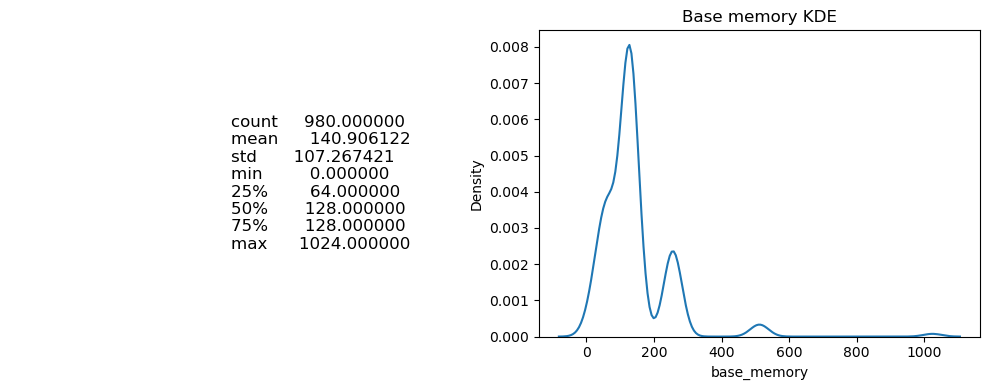

In [85]:
fig = plt.figure(figsize=(10, 4))

# Subplot 1: Summary statistics
ax1 = fig.add_subplot(1, 2, 1)
stats = df['base_memory'].describe().to_string()
ax1.text(0.5, 0.5, stats, fontsize=12, va='center')
ax1.axis('off')

# Subplot 2: KDE
ax2 = fig.add_subplot(1, 2, 2)
sns.kdeplot(df['base_memory'], ax=ax2)
ax2.set_title('Base memory KDE')

plt.tight_layout()
plt.show()

In [86]:
df['base_memory'].skew()  # positively skewed

3.8156751429133333

<Axes: xlabel='base_memory'>

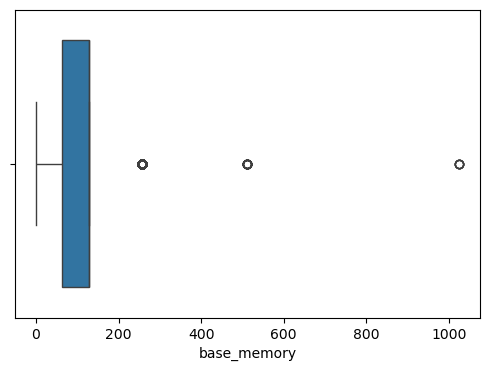

In [87]:
plt.figure(figsize=(6, 4))

sns.boxplot(df['base_memory'], orient='h')

In [88]:
print(df['base_memory'].value_counts().sort_index(ascending=True))

base_memory
0         2
8         1
16       12
32       67
64      191
128     523
256     157
512      22
1024      5
Name: count, dtype: int64


In [89]:
'''

battery_capacity

'''

'\n\nbattery_capacity\n\n'

In [90]:
df['battery_capacity'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 980 entries, 0 to 979
Series name: battery_capacity
Non-Null Count  Dtype  
--------------  -----  
969 non-null    float64
dtypes: float64(1)
memory usage: 7.8 KB


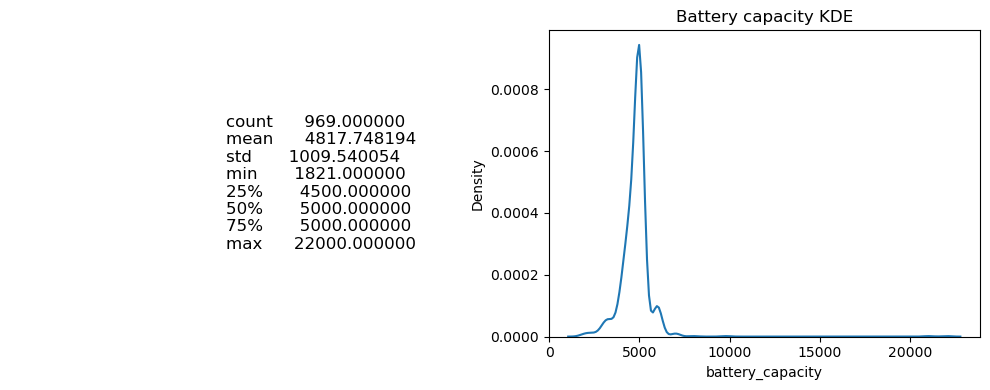

In [91]:
fig = plt.figure(figsize=(10, 4))

# Subplot 1: Summary statistics
ax1 = fig.add_subplot(1, 2, 1)
stats = df['battery_capacity'].describe().to_string()
ax1.text(0.5, 0.5, stats, fontsize=12, va='center')
ax1.axis('off')

# Subplot 2: KDE
ax2 = fig.add_subplot(1, 2, 2)
sns.kdeplot(df['battery_capacity'], ax=ax2)
ax2.set_title('Battery capacity KDE')

plt.tight_layout()
plt.show()

In [92]:
df[df['battery_capacity'] > 7500].head()  # these values can be considered as outliers

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,processor_name,processor_core,processor_speed,ram_capacity,base_memory,battery_capacity,fast_charging,screen_size,resolution,refresh_rate,num_rear_cam,num_front_cam,extended_memory,os,primary_camera_rear,primary_camera_front,num_cores
391,oukitel,Oukitel WP19,29990,84.0,False,True,False,helio,Helio G95,Octa Core,2.0,8.0,256,21000.0,33,6.78,1080 x 2400,60,3,1,0,android,64,16,8.0
599,oukitel,Oukitel WP21,22990,82.0,False,False,False,helio,Helio G99,Octa Core,2.2,12.0,256,9800.0,66,6.78,1080 x 2400,120,3,1,0,Not Specified,64,Main,8.0
843,doogee,Doogee V Max,45999,88.0,True,False,False,dimensity,Dimensity 1080,Octa Core,2.6,12.0,256,22000.0,33,6.58,1080 x 2408,120,3,1,2 TB,android,108,32,8.0
966,oukitel,Oukitel WP9,25899,72.0,False,True,False,helio,Helio P60,Octa Core,2.0,6.0,128,8000.0,-1,5.86,720 x 1520,60,3,1,0,android,16,8,8.0


<Axes: xlabel='battery_capacity'>

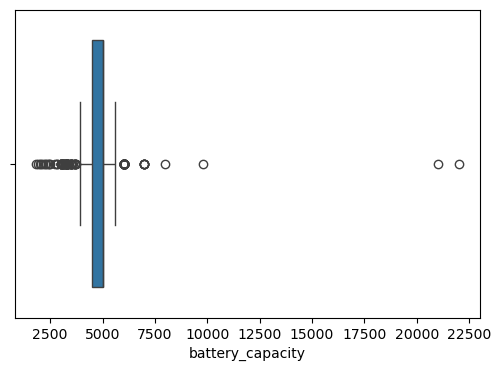

In [93]:
plt.figure(figsize=(6, 4))

sns.boxplot(df['battery_capacity'], orient='h')

In [94]:
df['battery_capacity'].skew()  # highly positively skewed

9.260986328291182

In [95]:
'''

fast_charging

'''

'\n\nfast_charging\n\n'

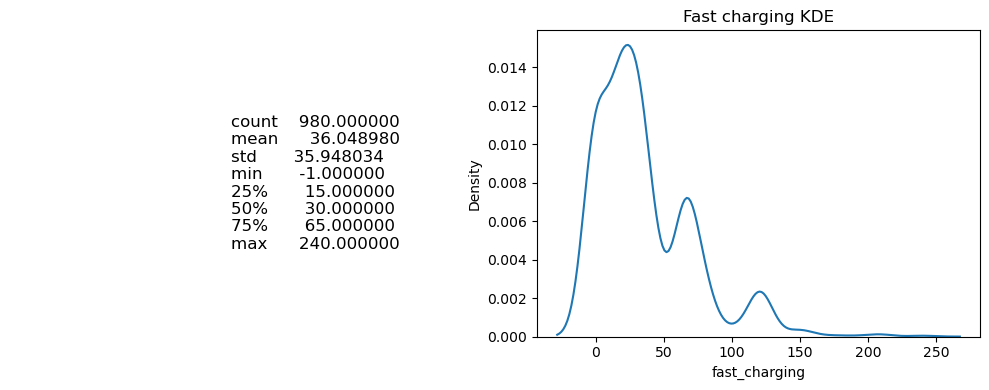

In [96]:
fig = plt.figure(figsize=(10, 4))

# Subplot 1: Summary statistics
ax1 = fig.add_subplot(1, 2, 1)
stats = df['fast_charging'].describe().to_string()
ax1.text(0.5, 0.5, stats, fontsize=12, va='center')
ax1.axis('off')

# Subplot 2: KDE
ax2 = fig.add_subplot(1, 2, 2)
sns.kdeplot(df['fast_charging'], ax=ax2)
ax2.set_title('Fast charging KDE')

plt.tight_layout()
plt.show()

<Axes: xlabel='fast_charging'>

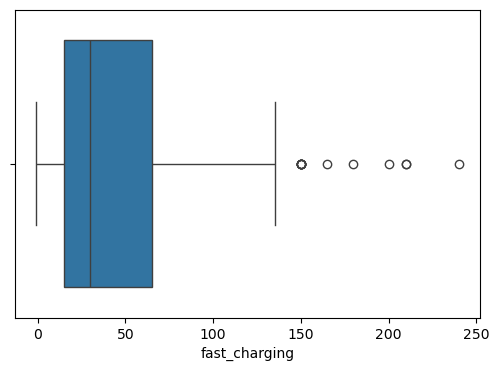

In [97]:
plt.figure(figsize=(6, 4))

sns.boxplot(df['fast_charging'], orient='h')

In [98]:
df['fast_charging'].skew()

1.5065740071474616

In [99]:
df['fast_charging'] = df['fast_charging'].astype(float)

In [100]:
df['fast_charging'] = df['fast_charging'].apply(lambda x : np.nan if x == -1 or x == 0 else x)

In [101]:
def fun(row):
  if row['fast_charging'] == -1:
    return 0
  else:
    return 1

In [102]:
fast_charging_available = df.apply(fun, axis=1)
df.insert(15, 'fast_charging_available', fast_charging_available)

In [103]:
'''

screen_size

'''

'\n\nscreen_size\n\n'

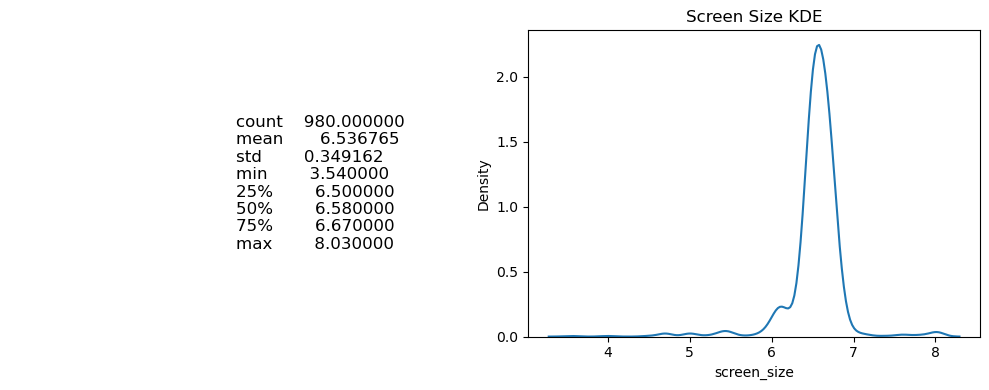

In [104]:
fig = plt.figure(figsize=(10, 4))

# Subplot 1: Summary statistics
ax1 = fig.add_subplot(1, 2, 1)
stats = df['screen_size'].describe().to_string()
ax1.text(0.5, 0.5, stats, fontsize=12, va='center')
ax1.axis('off')

# Subplot 2: KDE
ax2 = fig.add_subplot(1, 2, 2)
sns.kdeplot(df['screen_size'], ax=ax2)
ax2.set_title('Screen Size KDE')

plt.tight_layout()
plt.show()

<Axes: xlabel='screen_size'>

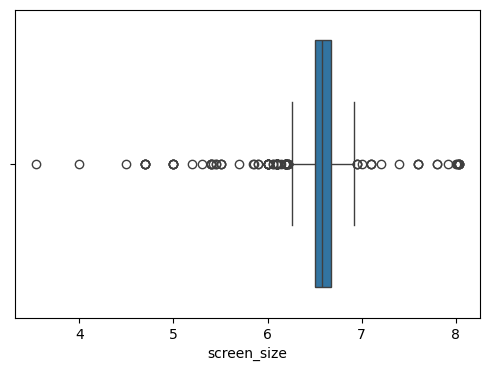

In [105]:
plt.figure(figsize=(6, 4))

sns.boxplot(df['screen_size'], orient='h')

In [106]:
df['screen_size'].skew()

-2.11619902968816

In [107]:
'''

resolution

'''

'\n\nresolution\n\n'

In [108]:
df['resolution'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 980 entries, 0 to 979
Series name: resolution
Non-Null Count  Dtype 
--------------  ----- 
980 non-null    object
dtypes: object(1)
memory usage: 7.8+ KB


In [109]:
'''

refresh_rate

'''

'\n\nrefresh_rate\n\n'

In [110]:
df['refresh_rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 980 entries, 0 to 979
Series name: refresh_rate
Non-Null Count  Dtype
--------------  -----
980 non-null    int64
dtypes: int64(1)
memory usage: 7.8 KB


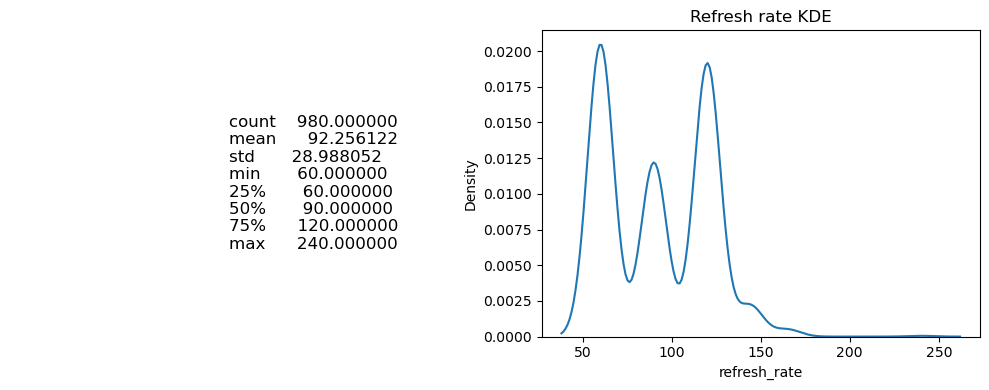

In [111]:
fig = plt.figure(figsize=(10, 4))

# Subplot 1: Summary statistics
ax1 = fig.add_subplot(1, 2, 1)
stats = df['refresh_rate'].describe().to_string()
ax1.text(0.5, 0.5, stats, fontsize=12, va='center')
ax1.axis('off')

# Subplot 2: KDE
ax2 = fig.add_subplot(1, 2, 2)
sns.kdeplot(df['refresh_rate'], ax=ax2)
ax2.set_title('Refresh rate KDE')

plt.tight_layout()
plt.show()

<Axes: xlabel='refresh_rate'>

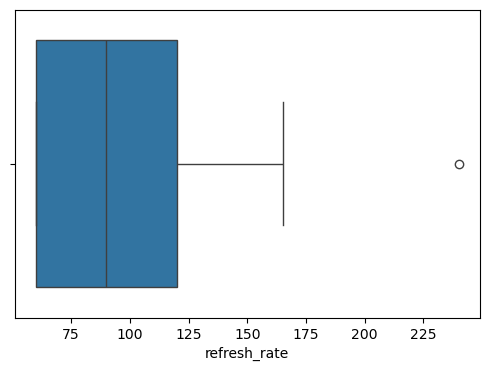

In [112]:
plt.figure(figsize=(6, 4))

sns.boxplot(df['refresh_rate'], orient='h')

In [113]:
df['refresh_rate'].skew()

0.29773297483356714

In [114]:
df['refresh_rate'].value_counts().sort_index(ascending=True)

refresh_rate
60     368
90     219
120    344
144     39
165      9
240      1
Name: count, dtype: int64

<Axes: xlabel='refresh_rate', ylabel='count'>

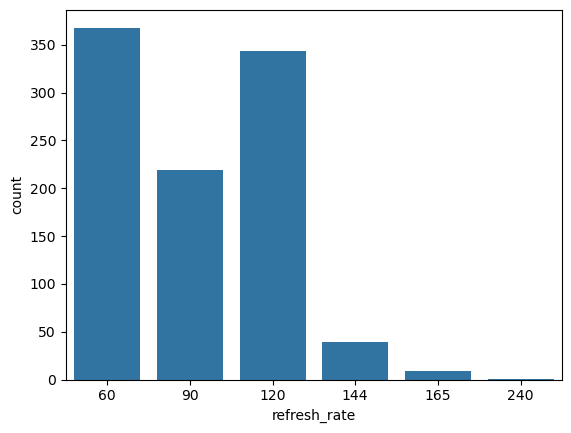

In [115]:
sns.barplot(df['refresh_rate'].value_counts().sort_index(ascending=True))

In [116]:
'''

extended_memory

'''

'\n\nextended_memory\n\n'

In [117]:
df['extended_memory'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 980 entries, 0 to 979
Series name: extended_memory
Non-Null Count  Dtype 
--------------  ----- 
980 non-null    object
dtypes: object(1)
memory usage: 7.8+ KB


In [118]:
df['extended_memory'].value_counts()

extended_memory
0          480
1 TB       262
512 GB     116
256 GB     100
128 GB       9
2 TB         6
32 GB        3
64 GB        3
1000 GB      1
Name: count, dtype: int64

In [119]:
ext_val_avl = df['extended_memory'].apply(lambda x : 0 if x == '0' else 1)
df.insert(22, 'extended_memory_available', ext_val_avl)

In [120]:
df['extended_memory'] = df['extended_memory'].str.strip()

In [121]:
def update_extended_memory(row):

  if row['extended_memory_available'] == 0:
    return np.nan
  else:
    if row['extended_memory'] == '1 TB':
      return 1024
    elif row['extended_memory'] == '512 GB':
      return 512
    elif row['extended_memory'] == '256 GB':
      return 256
    elif row['extended_memory'] == '128 GB':
      return 128
    elif row['extended_memory'] == '2 TB':
      return 2048
    elif row['extended_memory'] == '32 GB':
      return 32
    elif row['extended_memory'] == '64 GB':
      return 64
    elif row['extended_memory'] == '1000 GB':
      return 1024
    else:
      return row['extended_memory']

In [122]:
df['extended_memory'] = df.apply(update_extended_memory, axis=1)

In [123]:
def transform(row):
  if row['extended_memory'] == 1000:
    return 1024
  else:
    return row['extended_memory']

df['extended_memory'] = df.apply(transform, axis=1)

In [124]:
df['extended_memory'].value_counts()

extended_memory
1024.0    263
512.0     116
256.0     100
128.0       9
2048.0      6
32.0        3
64.0        3
Name: count, dtype: int64

In [125]:
'''

num_rear_cam

'''

'\n\nnum_rear_cam\n\n'

<Axes: xlabel='num_rear_cam'>

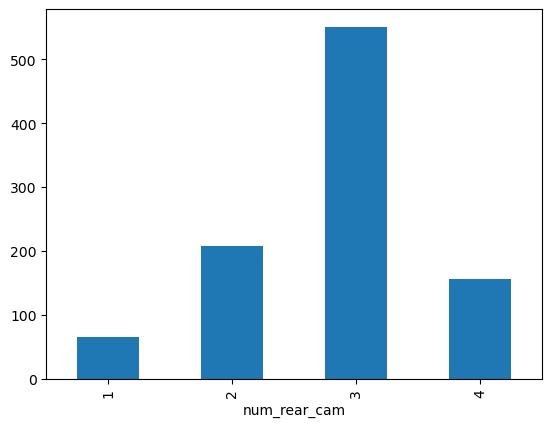

In [126]:
df['num_rear_cam'].value_counts().sort_index(ascending=True).plot(kind='bar')

In [127]:
'''

num_front_cam

'''

'\n\nnum_front_cam\n\n'

<Axes: xlabel='num_front_cam'>

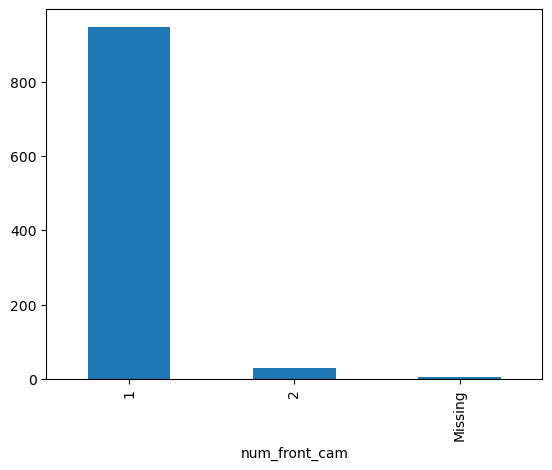

In [128]:
df['num_front_cam'].value_counts().plot(kind='bar')

In [129]:
tp = df[df['num_front_cam'] == 'Missing']
df.loc[tp.index, 'num_front_cam'] = 0

In [130]:
'''

primary_camera_rear

'''

'\n\nprimary_camera_rear\n\n'

In [131]:
df['primary_camera_rear'].value_counts()

primary_camera_rear
50          336
64          181
13          116
48          112
108          80
12           55
8            39
200          18
16           17
5             6
12.2          4
20            3
50.3          3
54            3
2             2
24            2
Foldable      1
47.2          1
40            1
Name: count, dtype: int64

In [132]:
'''

primary_camera_front

'''

'\n\nprimary_camera_front\n\n'

In [133]:
print(df['primary_camera_front'].value_counts())

primary_camera_front
16      307
8       178
32      155
5       119
12       46
13       41
20       37
10       23
50       12
60       10
44        8
40        6
2         5
7         5
24        3
25        3
10.8      3
48        2
11.1      2
0.3       1
2.1       1
Main      1
10.7      1
10.1      1
12.6      1
Name: count, dtype: int64


In [134]:
df['primary_camera_front'] = df['primary_camera_front'].apply(lambda x : np.nan if x == 'Main' else x).astype(float)

In [135]:
'''

os

'''

'\n\nos\n\n'

In [136]:
df['os'].value_counts()

os
android          910
ios               46
Not Specified     14
other             10
Name: count, dtype: int64

In [137]:
def os_funct(text):

  if 'Memory' in text:
    return np.nan
  elif 'Not Specified' in text:
    return 'other'
  else:
    return text

In [138]:
df['os'] = df['os'].apply(os_funct)

In [139]:
df['os'].value_counts()

os
android    910
ios         46
other       24
Name: count, dtype: int64

In [140]:
temp_df = df[['processor_name', 'extended_memory']]

In [141]:
df.drop(columns=['processor_name'], inplace = True)

In [142]:
df.columns

Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'processor_core',
       'processor_speed', 'ram_capacity', 'base_memory', 'battery_capacity',
       'fast_charging', 'fast_charging_available', 'screen_size', 'resolution',
       'refresh_rate', 'num_rear_cam', 'num_front_cam', 'extended_memory',
       'extended_memory_available', 'os', 'primary_camera_rear',
       'primary_camera_front', 'num_cores'],
      dtype='object')

In [143]:
df['price'] = df['price'].astype(float)

In [144]:
df.sample(2)

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,processor_core,processor_speed,ram_capacity,base_memory,battery_capacity,fast_charging,fast_charging_available,screen_size,resolution,refresh_rate,num_rear_cam,num_front_cam,extended_memory,extended_memory_available,os,primary_camera_rear,primary_camera_front,num_cores
344,apple,Apple iPhone 13 (256GB),72999.0,79.0,True,True,False,bionic,Hexa Core,3.22,4.0,256,3240.0,NaN,1,6.10,1170 x 2532,60,2,1,NaN,0,ios,12,12.0,6.0
805,vivo,Vivo T2 Pro 5G,29990.0,76.0,True,False,False,snapdragon,Octa Core,NaN,8.0,128,4500.0,67.0,1,6.44,1080 x 2408,90,3,1,1024.0,1,android,50,16.0,8.0


In [145]:
tpdfx = df[['price', 'rating', 'has_5g', 'has_nfc', 'processor_speed', 'has_ir_blaster', 'ram_capacity', 'base_memory', 'battery_capacity', 'fast_charging', 'screen_size', 'refresh_rate', 'num_rear_cam', 'num_front_cam', 'extended_memory_available', 'num_cores']]

In [146]:
tpdfx.sample(6)

,price,rating,has_5g,has_nfc,processor_speed,has_ir_blaster,ram_capacity,base_memory,battery_capacity,fast_charging,screen_size,refresh_rate,num_rear_cam,num_front_cam,extended_memory_available,num_cores
175,11999.0,80.0,False,False,2.05,True,6.0,64,5000.0,33.0,6.43,60,4,1,1,8.0
115,29340.0,83.0,True,True,3.00,False,8.0,128,4500.0,80.0,6.43,90,3,1,0,8.0
9,28999.0,84.0,True,True,3.00,False,8.0,128,4500.0,80.0,6.43,90,3,1,0,8.0
722,5990.0,NaN,False,False,1.30,False,1.0,16,4000.0,NaN,6.50,60,3,1,1,4.0
825,9299.0,67.0,False,False,2.00,False,4.0,128,5000.0,10.0,6.53,60,1,1,1,8.0
850,10490.0,67.0,False,False,2.30,False,3.0,64,5000.0,NaN,6.51,60,2,1,1,8.0


In [147]:
tpdfx.corr()['rating']

price                        0.283504
rating                       1.000000
has_5g                       0.596087
has_nfc                      0.474754
processor_speed              0.628446
has_ir_blaster               0.156421
ram_capacity                 0.542422
base_memory                  0.482552
battery_capacity            -0.015581
fast_charging                0.527613
screen_size                  0.298272
refresh_rate                 0.610795
num_rear_cam                 0.515531
num_front_cam                0.131480
extended_memory_available   -0.343502
num_cores                    0.199741
Name: rating, dtype: float64

In [148]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand                0
processor_core                 6
processor_speed               42
ram_capacity                   0
base_memory                    0
battery_capacity              11
fast_charging                211
fast_charging_available        0
screen_size                    0
resolution                     0
refresh_rate                   0
num_rear_cam                   0
num_front_cam                  0
extended_memory              480
extended_memory_available      0
os                             0
primary_camera_rear            0
primary_camera_front          10
num_cores                      6
dtype: int64

In [149]:
'''

num_cores

'''

'\n\nnum_cores\n\n'

In [150]:
df['processor_core'] = df['processor_core'].replace('Octa Core', '8')
df['processor_core'] = df['processor_core'].replace('Hexa Core', '6')
df['processor_core'] = df['processor_core'].replace('Quad Core', '4')

In [151]:
df.sample(2)

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,processor_core,processor_speed,ram_capacity,base_memory,battery_capacity,fast_charging,fast_charging_available,screen_size,resolution,refresh_rate,num_rear_cam,num_front_cam,extended_memory,extended_memory_available,os,primary_camera_rear,primary_camera_front,num_cores
32,vivo,Vivo V27,27990.0,83.0,True,False,False,dimensity,8,2.2,8.0,256,4700.0,67.0,1,6.56,1080 x 2400,120,3,1,NaN,0,android,64,50.0,8.0
36,oppo,Oppo Reno 8T,29990.0,87.0,True,True,False,snapdragon,8,2.2,8.0,256,5000.0,66.0,1,6.67,1080 x 2400,120,3,1,1024.0,1,android,108,16.0,8.0


In [152]:
#df.to_csv('smartphone_cleaned_v4.csv', index=False)

In [153]:
new_df = pd.read_csv('../data/processed/smartphone_cleaned_v4.csv')

In [154]:
print(new_df.isnull().sum())

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand                0
processor_core                 6
processor_speed               42
ram_capacity                   0
base_memory                    0
battery_capacity              11
fast_charging                211
fast_charging_available        0
screen_size                    0
resolution                     0
refresh_rate                   0
num_rear_cam                   0
num_front_cam                  0
extended_memory              480
extended_memory_available      0
os                             0
primary_camera_rear            0
primary_camera_front          10
num_cores                      6
dtype: int64


In [155]:
tp_df = df[['price', 'rating', 'has_5g', 'has_nfc', 'processor_speed', 'has_ir_blaster', 'ram_capacity', 'base_memory', 'battery_capacity', 'fast_charging', 'screen_size', 'refresh_rate', 'num_rear_cam', 'num_front_cam', 'extended_memory_available', 'num_cores']]

In [156]:
from sklearn.impute import KNNImputer

print("Missing values before imputation:\n", tp_df.isnull().sum())

Missing values before imputation:
 price                          0
rating                       101
has_5g                         0
has_nfc                        0
processor_speed               42
has_ir_blaster                 0
ram_capacity                   0
base_memory                    0
battery_capacity              11
fast_charging                211
screen_size                    0
refresh_rate                   0
num_rear_cam                   0
num_front_cam                  0
extended_memory_available      0
num_cores                      6
dtype: int64


In [157]:
knn = KNNImputer(n_neighbors=3, weights  = 'distance')

return_array = knn.fit_transform(tp_df)

In [158]:
imputed_df = pd.DataFrame(return_array, columns=tp_df.columns)

In [159]:
x = imputed_df.corr()[['price']].reset_index()

y = tp_df.corr()[['price']].reset_index()

In [160]:
merged_corr = x.merge(y, on='index', suffixes=('_imputed', '_original'))

In [161]:
merged_corr['difference'] = merged_corr['price_imputed'] - merged_corr['price_original']

merged_corr

,index,price_imputed,price_original,difference
0,price,1.000000,1.000000,0.000000
1,rating,0.343610,0.283504,0.060107
2,has_5g,0.305066,0.305066,0.000000
3,has_nfc,0.470951,0.470951,0.000000
4,processor_speed,0.496817,0.474049,0.022768
5,has_ir_blaster,-0.015807,-0.015807,0.000000
6,ram_capacity,0.292540,0.292540,0.000000
7,base_memory,0.556033,0.556033,0.000000
8,battery_capacity,-0.158560,-0.159232,0.000672
9,fast_charging,0.256367,0.277591,-0.021225


In [162]:
df['brand_name'] = df['brand_name'].astype('category')

In [163]:
df.sample(6)

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,processor_core,processor_speed,ram_capacity,base_memory,battery_capacity,fast_charging,fast_charging_available,screen_size,resolution,refresh_rate,num_rear_cam,num_front_cam,extended_memory,extended_memory_available,os,primary_camera_rear,primary_camera_front,num_cores
906,nothing,Nothing Phone 1 Lite,24990.0,80.0,True,True,False,snapdragon,8,2.5,6.0,128,5000.0,33.0,1,6.55,1080 x 2400,120,2,1,NaN,0,android,50,16.0,8.0
787,realme,Realme GT Neo 3T (8GB RAM + 256GB),28499.0,82.0,True,False,False,snapdragon,8,3.2,8.0,256,5000.0,80.0,1,6.62,1080 x 2400,120,3,1,NaN,0,android,64,16.0,8.0
352,xiaomi,Xiaomi Redmi K60 Pro,38999.0,85.0,True,True,True,snapdragon,8,3.2,8.0,128,5000.0,120.0,1,6.67,1440 x 3200,120,3,1,NaN,0,android,54,16.0,8.0
891,lyf,Lyf Earth 2,3890.0,NaN,False,False,False,snapdragon,8,1.5,3.0,32,2500.0,NaN,1,5.00,1080 x 1920,60,1,1,64.0,1,android,13,13.0,8.0
204,poco,Poco M4 5G,11499.0,75.0,True,False,True,dimensity,8,2.2,4.0,64,5000.0,18.0,1,6.58,1080 x 2400,90,2,1,512.0,1,android,50,8.0,8.0
385,samsung,Samsung Galaxy A04s,12990.0,71.0,False,False,False,exynos,8,2.0,4.0,64,5000.0,15.0,1,6.50,720 x 1600,90,3,1,1024.0,1,android,50,5.0,8.0


In [164]:
temp_df

,processor_name,extended_memory
0,Snapdragon 8 Gen2,NaN
1,Snapdragon 695,1024.0
2,Exynos 1330,1024.0
3,Snapdragon 695,1024.0
4,Dimensity 1080,NaN
...,...,...
975,Snapdragon 8 Gen1,NaN
976,Snapdragon 480+,1024.0
977,Dimensity 8100,NaN
978,Snapdragon 695,1024.0


In [165]:
#df.to_csv('smartphone_cleaned_v6.csv', index = False)


# **EDA - 2**


In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [169]:
df = pd.read_csv("../data/processed/smartphone_cleaned_v6.csv")

In [170]:
df.shape

(980, 26)

In [171]:
df.size

25480

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    float64
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            980 non-null    object 
 8   processor_core             974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  ram_capacity               980 non-null    float64
 11  base_memory                980 non-null    int64  
 12  battery_capacity           969 non-null    float64
 13  fast_charging              769 non-null    float64

In [173]:
df.describe()

,price,rating,processor_core,processor_speed,ram_capacity,base_memory,battery_capacity,fast_charging,fast_charging_available,screen_size,refresh_rate,num_rear_cam,num_front_cam,extended_memory,extended_memory_available,primary_camera_front,num_cores
count,980.000000,879.000000,974.000000,938.000000,980.000000,980.000000,969.000000,769.000000,980.0,980.000000,980.000000,980.000000,980.000000,500.000000,980.000000,970.000000,974.000000
mean,32520.504082,78.258248,7.772074,2.427217,6.682653,140.906122,4817.748194,46.126138,1.0,6.536765,92.256122,2.814286,1.025510,736.064000,0.510204,16.614845,7.772074
std,39531.812669,7.402854,0.836845,0.464090,3.774045,107.267421,1009.540054,34.277870,0.0,0.349162,28.988052,0.776441,0.181814,366.894911,0.500151,10.898756,0.836845
min,3499.000000,60.000000,4.000000,1.200000,1.000000,0.000000,1821.000000,10.000000,1.0,3.540000,60.000000,1.000000,0.000000,32.000000,0.000000,0.300000,4.000000
25%,12999.000000,74.000000,8.000000,2.050000,4.000000,64.000000,4500.000000,18.000000,1.0,6.500000,60.000000,2.000000,1.000000,512.000000,0.000000,8.000000,8.000000
50%,19994.500000,80.000000,8.000000,2.300000,6.000000,128.000000,5000.000000,33.000000,1.0,6.580000,90.000000,3.000000,1.000000,1024.000000,1.000000,16.000000,8.000000
75%,35491.500000,84.000000,8.000000,2.840000,8.000000,128.000000,5000.000000,66.000000,1.0,6.670000,120.000000,3.000000,1.000000,1024.000000,1.000000,16.000000,8.000000
max,650000.000000,89.000000,8.000000,3.220000,64.000000,1024.000000,22000.000000,240.000000,1.0,8.030000,240.000000,4.000000,2.000000,2048.000000,1.000000,60.000000,8.000000


In [174]:
print(df.isnull().sum())

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand                0
processor_core                 6
processor_speed               42
ram_capacity                   0
base_memory                    0
battery_capacity              11
fast_charging                211
fast_charging_available        0
screen_size                    0
resolution                     0
refresh_rate                   0
num_rear_cam                   0
num_front_cam                  0
extended_memory              480
extended_memory_available      0
os                             0
primary_camera_rear            0
primary_camera_front          10
num_cores                      6
dtype: int64


In [175]:
df.sample(6)

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,processor_core,processor_speed,ram_capacity,base_memory,battery_capacity,fast_charging,fast_charging_available,screen_size,resolution,refresh_rate,num_rear_cam,num_front_cam,extended_memory,extended_memory_available,os,primary_camera_rear,primary_camera_front,num_cores
235,xiaomi,Xiaomi Mix Fold 2 5G,106990.0,NaN,True,True,True,snapdragon,8.0,3.2,12.0,256,4500.0,67.0,1,8.02,1914 x 2160,120,3,1,NaN,0,android,50,20.0,8.0
186,motorola,Motorola Moto G82 (8GB RAM + 128GB),20499.0,86.0,True,True,False,snapdragon,8.0,2.2,8.0,128,5000.0,30.0,1,6.60,1080 x 2400,120,3,1,1024.0,1,android,50,16.0,8.0
639,letv,Letv Y1 Pro Plus,5999.0,60.0,False,False,False,tiger,4.0,1.8,6.0,64,4000.0,10.0,1,6.50,720 x 1560,60,2,1,NaN,0,android,8,5.0,4.0
880,apple,Apple iPhone 12 Mini (256GB),55999.0,75.0,True,True,False,bionic,6.0,3.1,4.0,256,NaN,NaN,1,5.40,1080 x 2340,60,2,1,NaN,0,ios,12,12.0,6.0
972,itel,itel A23s,4787.0,NaN,False,False,False,spreadtrum,4.0,1.4,2.0,32,3020.0,NaN,1,5.00,854 x 480,60,1,0,NaN,0,android,2,NaN,4.0
465,oppo,OPPO Reno7 Z 5G,17999.0,84.0,True,True,False,snapdragon,8.0,2.2,8.0,128,4500.0,33.0,1,6.43,1080 x 2400,60,3,1,NaN,0,android,64,16.0,8.0


## **Univariate Analysis**

### **Categorical Columns - Univariate Analysis**

#### **brand_name**

<Axes: xlabel='brand_name'>

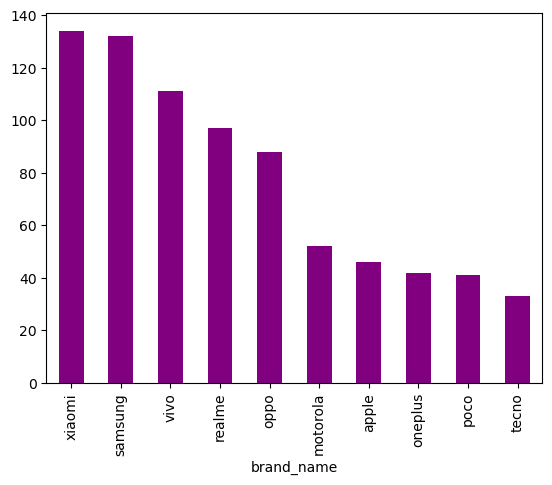

In [179]:
# Top 10 brands

df['brand_name'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', color = 'purple')

C:\Users\Nihal\AppData\Local\Temp\ipykernel_10036\3283563040.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=df['brand_name'], order=df['brand_name'].value_counts().index, palette = 'viridis')


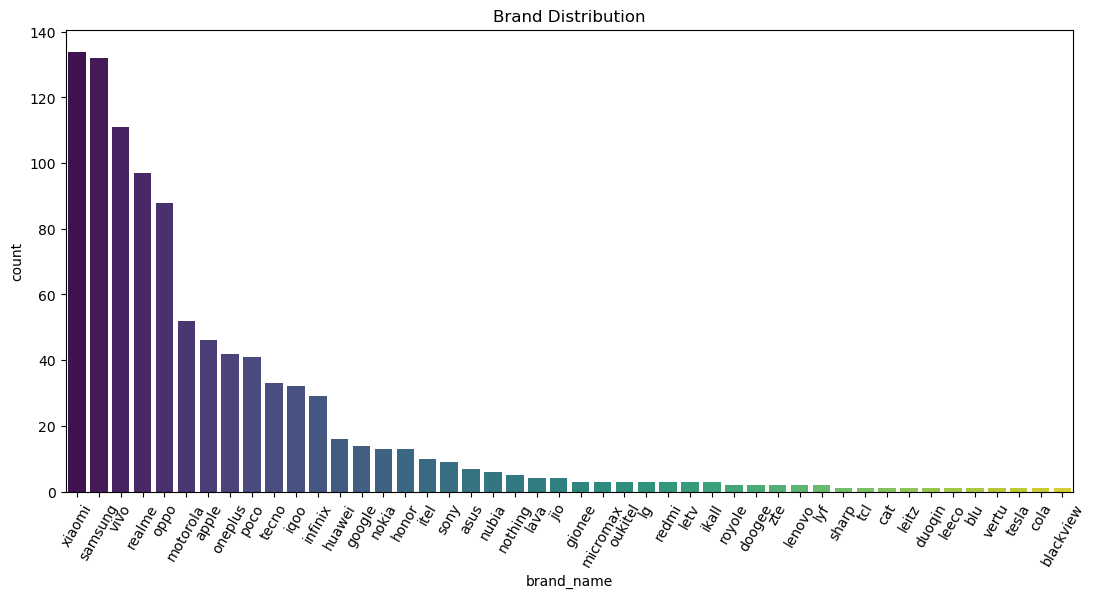

In [180]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df, x=df['brand_name'], order=df['brand_name'].value_counts().index, palette = 'viridis')
plt.title("Brand Distribution")
plt.xticks(rotation=60)
plt.show()

<Axes: ylabel='count'>

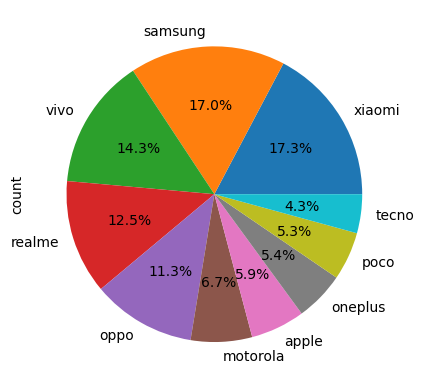

In [181]:
# Top 10 brands

df['brand_name'].value_counts().sort_values(ascending=False).head(10).plot(kind='pie', autopct='%0.1f%%')

In [182]:
df['brand_name'].value_counts(normalize=True).cumsum()

brand_name
xiaomi       0.136735
samsung      0.271429
vivo         0.384694
realme       0.483673
oppo         0.573469
motorola     0.626531
apple        0.673469
oneplus      0.716327
poco         0.758163
tecno        0.791837
iqoo         0.824490
infinix      0.854082
huawei       0.870408
google       0.884694
nokia        0.897959
honor        0.911224
itel         0.921429
sony         0.930612
asus         0.937755
nubia        0.943878
nothing      0.948980
lava         0.953061
jio          0.957143
gionee       0.960204
micromax     0.963265
oukitel      0.966327
lg           0.969388
redmi        0.972449
letv         0.975510
ikall        0.978571
royole       0.980612
doogee       0.982653
zte          0.984694
lenovo       0.986735
lyf          0.988776
sharp        0.989796
tcl          0.990816
cat          0.991837
leitz        0.992857
duoqin       0.993878
leeco        0.994898
blu          0.995918
vertu        0.996939
tesla        0.997959
cola         0.998980

C:\Users\Nihal\AppData\Local\Temp\ipykernel_10036\1526177276.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="Blues_r")


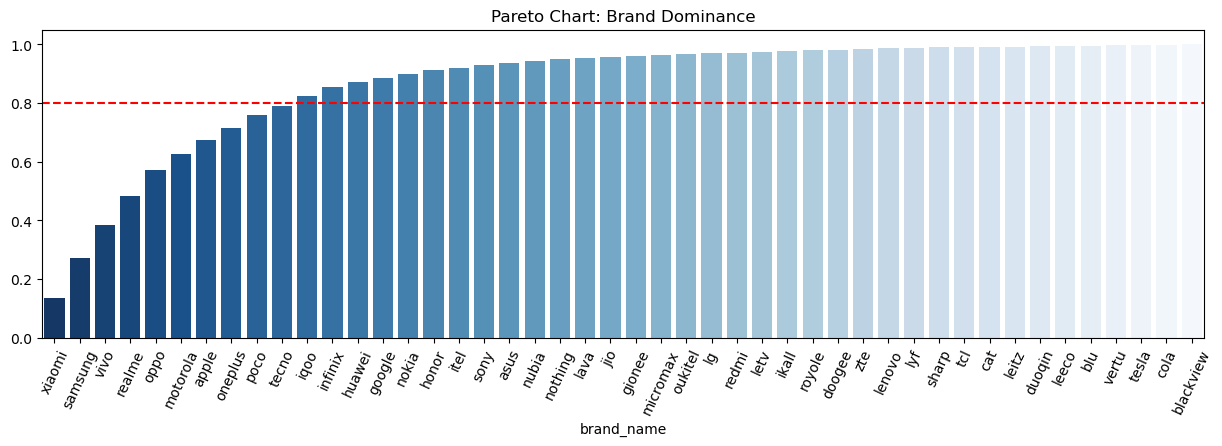

In [183]:
# Pareto Analysis
brand_counts = df['brand_name'].value_counts(normalize=True).cumsum()
plt.figure(figsize=(15, 4))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="Blues_r")
plt.axhline(0.8, color='red', linestyle='--', label='80% Threshold')
plt.title("Pareto Chart: Brand Dominance")
plt.xticks(rotation=65)
plt.show()

#### **model**

In [185]:
df['model'].nunique()

980

#### **processor_brand**

C:\Users\Nihal\AppData\Local\Temp\ipykernel_10036\3031504840.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='processor_brand', order=order, palette='coolwarm', edgecolor='black')


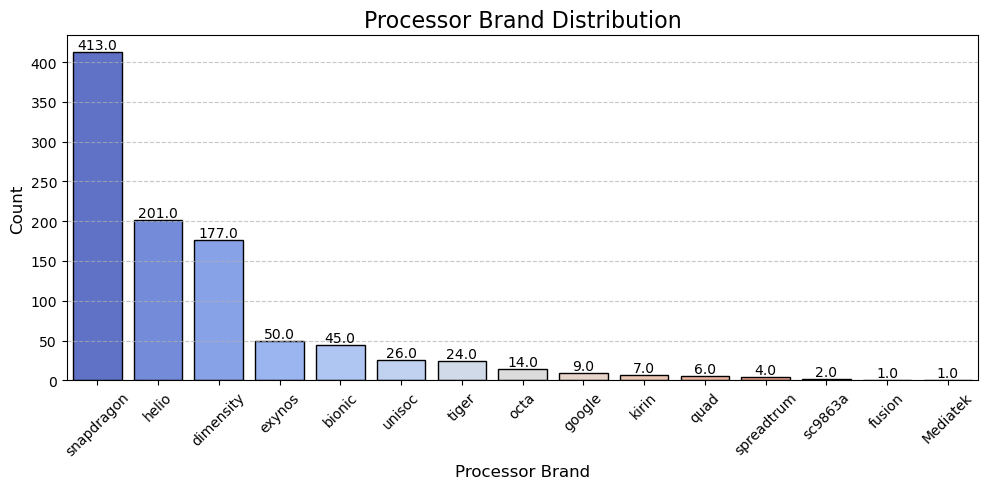

In [187]:
plt.figure(figsize=(10, 5))

order = df['processor_brand'].value_counts().index

ax = sns.countplot(data=df, x='processor_brand', order=order, palette='coolwarm', edgecolor='black')

ax.set_title("Processor Brand Distribution", fontsize=16)
ax.set_xlabel("Processor Brand", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for patch in ax.patches:
    height = patch.get_height()
    ax.annotate(f'{height}',
                (patch.get_x() + patch.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

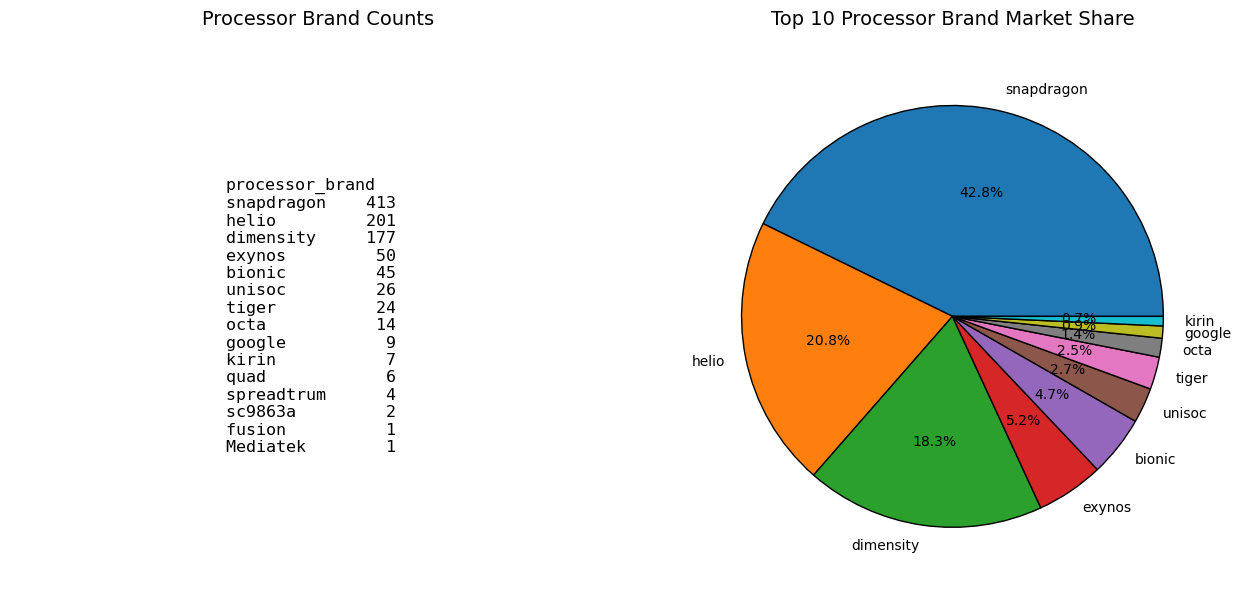

In [188]:
fig = plt.figure(figsize=(13, 6))

# Subplot 1: Summary statistics
ax1 = fig.add_subplot(1, 2, 1)
stats = df['processor_brand'].value_counts().sort_values(ascending=False)
stats_text = stats.to_string()
ax1.text(0.35, 0.5, stats_text, fontsize=12, va='center', ha='left', family='monospace')
ax1.axis('off')
ax1.set_title('Processor Brand Counts', fontsize=14, pad=20)

# Subplot 2: Pie chart
ax2 = fig.add_subplot(1, 2, 2)
top_brands = df['processor_brand'].value_counts().sort_values(ascending=False).head(10)
top_brands.plot(kind='pie', autopct='%0.1f%%', ax=ax2, counterclock=True, wedgeprops={'edgecolor': 'black'})
ax2.set_ylabel('')
ax2.set_title('Top 10 Processor Brand Market Share', fontsize=14, pad=20)

plt.tight_layout()
plt.show()

#### **os**

C:\Users\Nihal\AppData\Local\Temp\ipykernel_10036\4189612653.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=df['os'], order=df['os'].value_counts().index, palette = 'coolwarm')


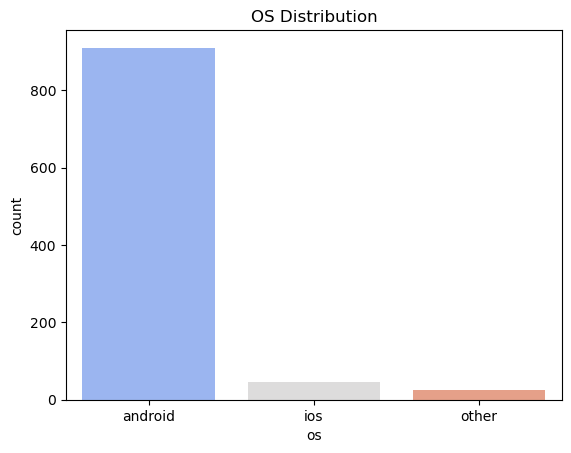

In [190]:
sns.countplot(data=df, x=df['os'], order=df['os'].value_counts().index, palette = 'coolwarm')
plt.title("OS Distribution")
plt.show()

<Axes: ylabel='count'>

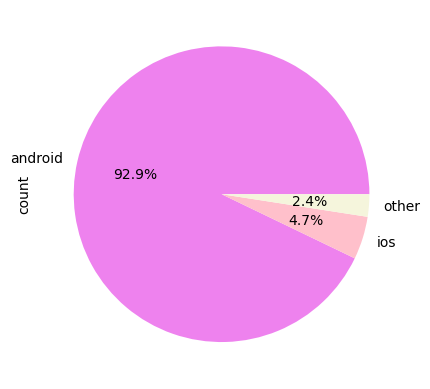

In [191]:
colors = ("violet", "pink", "beige")

df['os'].value_counts().sort_values(ascending=False).head(10).plot(kind='pie', autopct='%0.1f%%', colors=colors)

#### **resolution**

In [193]:
df['resolution'].nunique()

83

In [194]:
temp_df = df['resolution'].value_counts().reset_index().head(10)
temp_df.columns = ['resolution', 'count']

temp_df

,resolution,count
0,1080 x 2400,342
1,720 x 1600,149
2,1080 x 2408,65
3,1080 x 2412,58
4,1080 x 2340,43
5,1080 x 2460,39
6,1440 x 3200,31
7,720 x 1612,18
8,1170 x 2532,16
9,720 x 1560,13


C:\Users\Nihal\AppData\Local\Temp\ipykernel_10036\2450708982.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temp_df, x='resolution', y='count', palette = 'coolwarm')


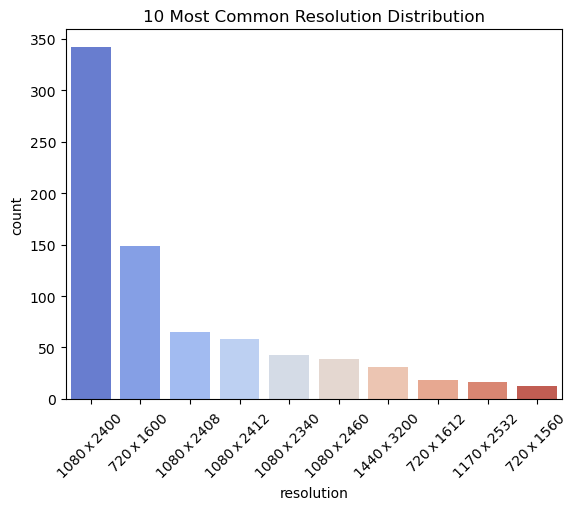

In [195]:
sns.barplot(data=temp_df, x='resolution', y='count', palette = 'coolwarm')
plt.title("10 Most Common Resolution Distribution")
plt.xticks(rotation=45)
plt.show()

#### **processor_core**

C:\Users\Nihal\AppData\Local\Temp\ipykernel_10036\2567474957.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='processor_core', palette='magma', edgecolor='black')


Text(0, 0.5, 'Count')

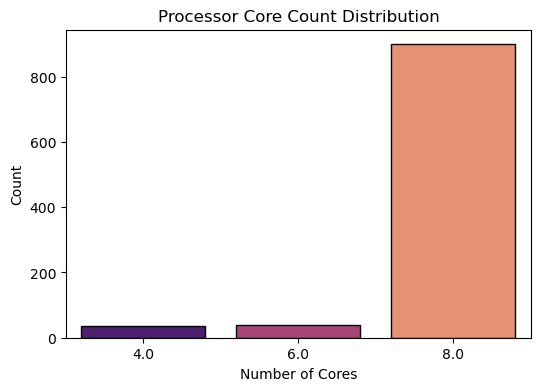

In [197]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='processor_core', palette='magma', edgecolor='black')
plt.title("Processor Core Count Distribution")
plt.xlabel("Number of Cores")
plt.ylabel("Count")

### **Numerical Columns - Univariate Analysis**

#### **price**

In [200]:
df['price'].describe()

count       980.000000
mean      32520.504082
std       39531.812669
min        3499.000000
25%       12999.000000
50%       19994.500000
75%       35491.500000
max      650000.000000
Name: price, dtype: float64

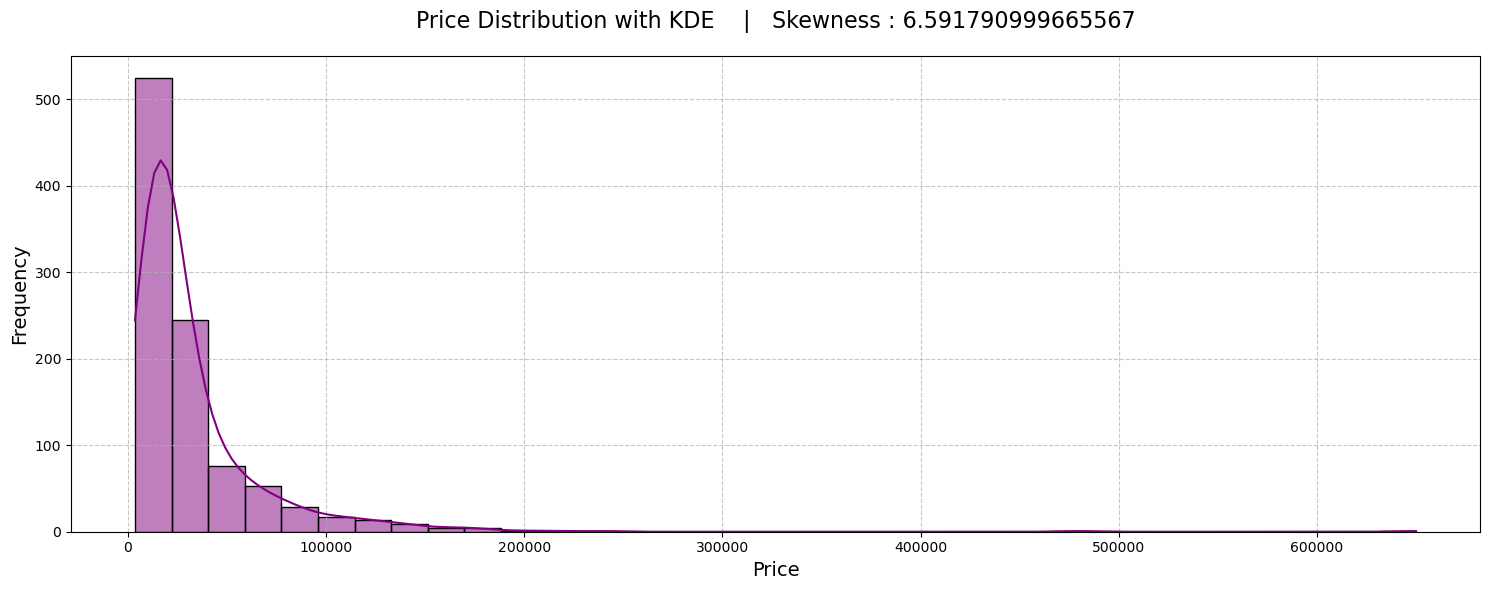

In [201]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.histplot(data=df, x='price', kde=True, bins=35, color='purple', edgecolor='black', ax=ax)

skw = df['price'].skew()

ax.set_title(f'Price Distribution with KDE    |   Skewness : {skw}', fontsize=16, pad=20)
ax.set_xlabel('Price', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

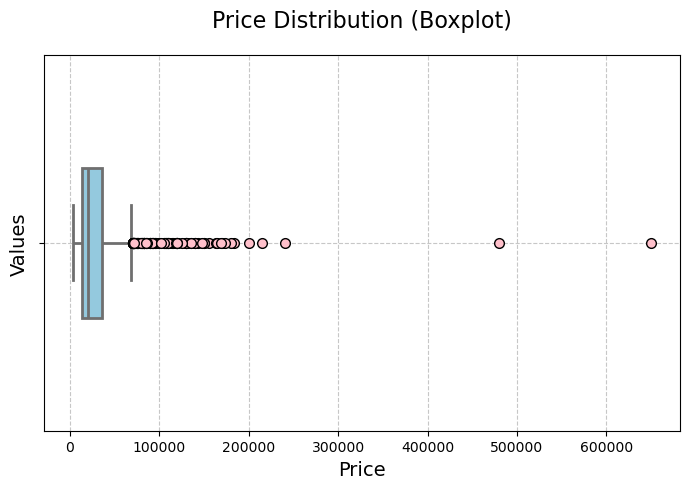

In [202]:
plt.figure(figsize=(7, 5))

sns.boxplot(x=df['price'], color='skyblue', width=0.4, linewidth=2, flierprops=dict(marker='o', markersize=7, markerfacecolor='pink', markeredgecolor='black'))

plt.title('Price Distribution (Boxplot)', fontsize=16, pad=20)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Values', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

In [203]:
df[df['price'] > 250000]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,processor_core,processor_speed,ram_capacity,base_memory,battery_capacity,fast_charging,fast_charging_available,screen_size,resolution,refresh_rate,num_rear_cam,num_front_cam,extended_memory,extended_memory_available,os,primary_camera_rear,primary_camera_front,num_cores
427,vertu,Vertu Signature Touch,650000.0,62.0,False,True,False,snapdragon,8.0,1.5,2.0,64,2275.0,NaN,1,4.70,1080 x 1920,60,1,1,NaN,0,android,13,2.1,8.0
887,xiaomi,Xiaomi Redmi K20 Pro Signature Edition,480000.0,88.0,False,True,False,snapdragon,8.0,2.8,8.0,256,4000.0,27.0,1,6.39,1080 x 2340,60,3,1,NaN,0,android,48,20.0,8.0


In [204]:
df['price'].isnull().sum()

0

In [205]:
# Advanced summary stats
df['price'].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

count       980.000000
mean      32520.504082
std       39531.812669
min        3499.000000
1%         5449.890000
5%         7395.050000
25%       12999.000000
50%       19994.500000
75%       35491.500000
95%       99990.450000
99%      165034.200000
max      650000.000000
Name: price, dtype: float64

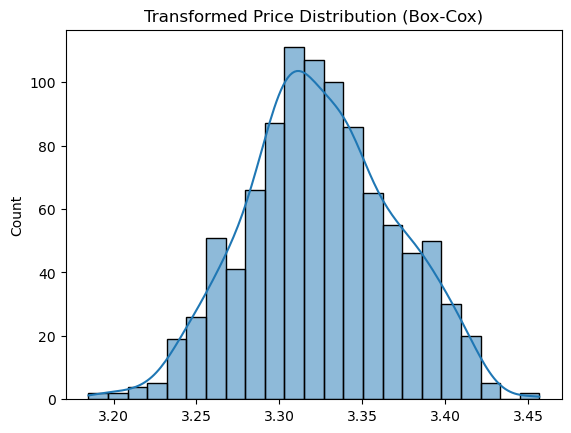

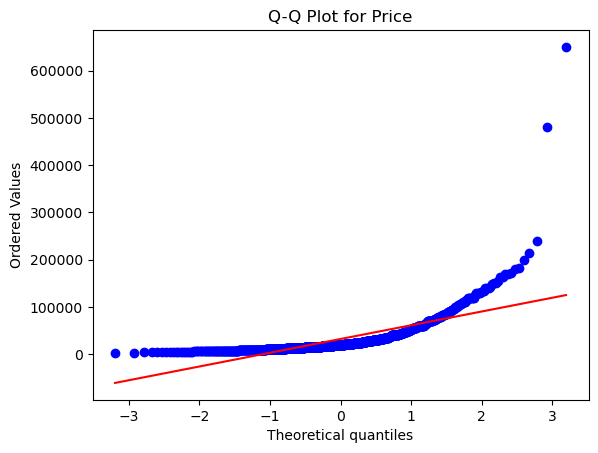

In [206]:
# Box-Cox transformation for skewed data
from scipy.stats import boxcox
price_transformed, _ = boxcox(df['price'].dropna() + 1)  # Handle zeros
sns.histplot(price_transformed, kde=True)
plt.title("Transformed Price Distribution (Box-Cox)")
plt.show()

# Quantile-Quantile Plot
import scipy.stats as stats
stats.probplot(df['price'].dropna(), dist="norm", plot=plt)
plt.title("Q-Q Plot for Price")
plt.show()

In [207]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(contamination=0.05)
outliers = clf.fit_predict(df[['price']].dropna())
print(f"Outliers detected: {sum(outliers == -1)}")

Outliers detected: 48


#### **rating**

In [209]:
df['rating'].describe()

count    879.000000
mean      78.258248
std        7.402854
min       60.000000
25%       74.000000
50%       80.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

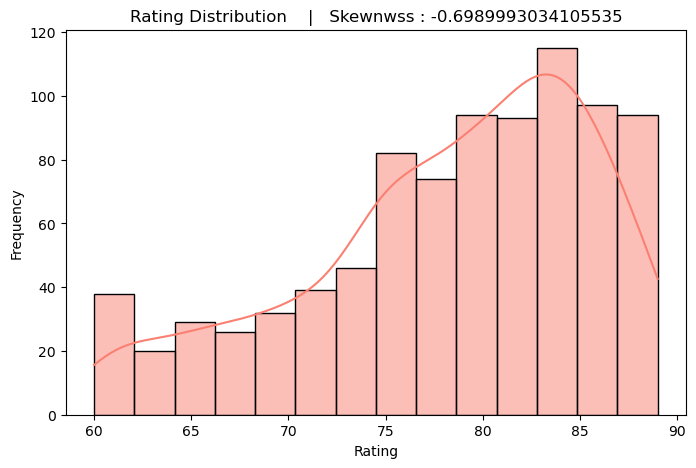

In [210]:
skw = df['rating'].skew()

plt.figure(figsize=(8,5))
sns.histplot(df['rating'].dropna(), kde=True, color='salmon', edgecolor='black')
plt.title(f"Rating Distribution    |   Skewnwss : {skw}")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

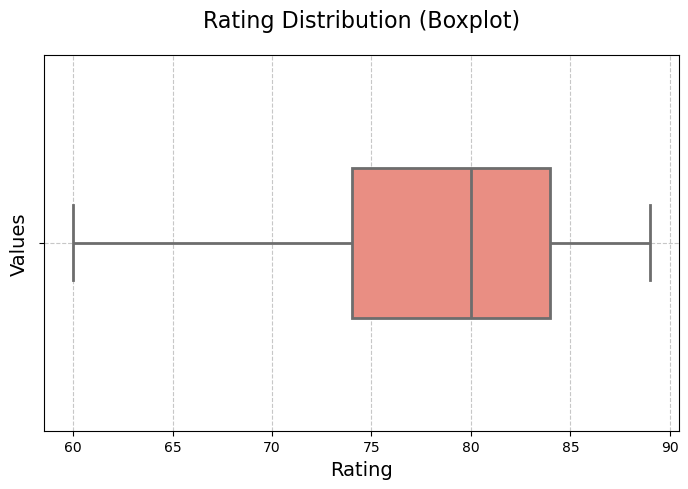

In [211]:
plt.figure(figsize=(7, 5))

sns.boxplot(x=df['rating'], color='salmon', width=0.4, linewidth=2, flierprops=dict(marker='o', markersize=7, markerfacecolor='violet', markeredgecolor='black'))

plt.title('Rating Distribution (Boxplot)', fontsize=16, pad=20)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Values', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

#### **processor_speed**

In [213]:
df['processor_speed'].describe()

count    938.000000
mean       2.427217
std        0.464090
min        1.200000
25%        2.050000
50%        2.300000
75%        2.840000
max        3.220000
Name: processor_speed, dtype: float64

C:\Users\Nihal\AppData\Local\Temp\ipykernel_10036\3540001069.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=processor_speed_counts.index,


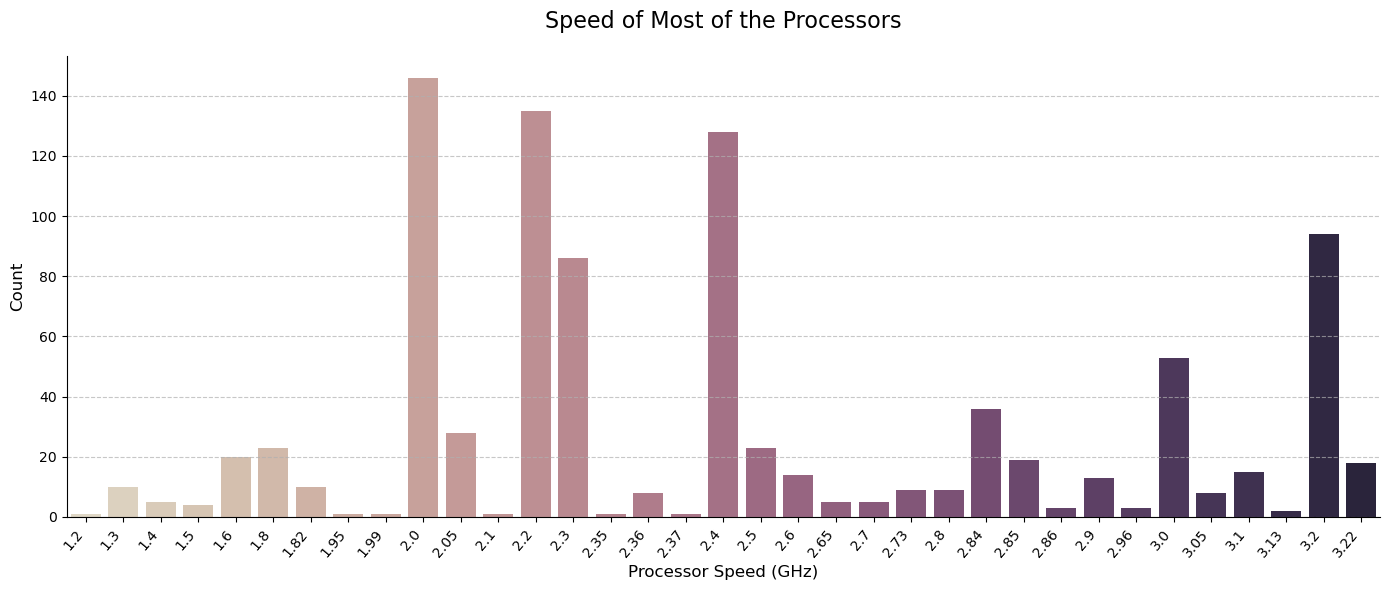

In [214]:
plt.figure(figsize=(14, 6))

processor_speed_counts = df['processor_speed'].value_counts().sort_values(ascending=False)

sns.barplot(x=processor_speed_counts.index,
            y=processor_speed_counts.values,
            palette='ch:s=-.2,r=.6')

plt.title("Speed of Most of the Processors", fontsize=16, pad=20)
plt.xlabel("Processor Speed (GHz)", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.xticks(rotation=50, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

plt.tight_layout()
plt.show()

#### **ram_capacity**

In [216]:
df['ram_capacity'].describe()

count    980.000000
mean       6.682653
std        3.774045
min        1.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       64.000000
Name: ram_capacity, dtype: float64

C:\Users\Nihal\AppData\Local\Temp\ipykernel_10036\3126881787.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['ram_capacity'].value_counts(), palette = 'icefire')


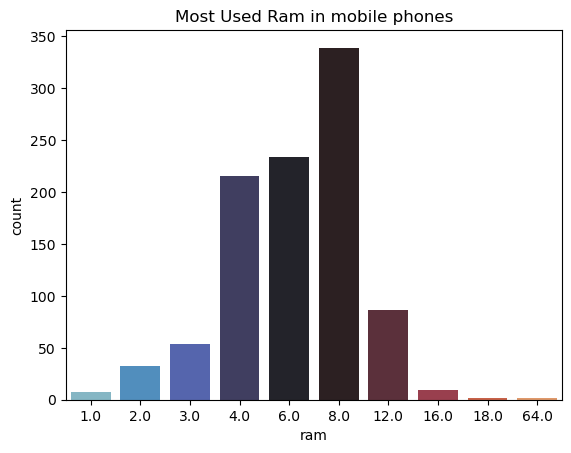

In [217]:
sns.barplot(df['ram_capacity'].value_counts(), palette = 'icefire')

plt.title("Most Used Ram in mobile phones")
plt.xlabel("ram")
plt.ylabel("count")
plt.show()

<Axes: ylabel='count'>

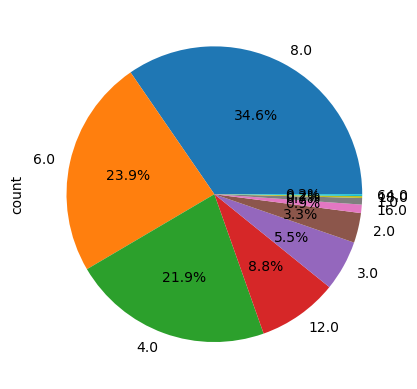

In [218]:
df['ram_capacity'].value_counts().plot(kind='pie',autopct="%0.1f%%")

#### **base_memory**

C:\Users\Nihal\AppData\Local\Temp\ipykernel_10036\1117601858.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['base_memory'].value_counts(), palette = 'cubehelix')


<Axes: xlabel='base_memory', ylabel='count'>

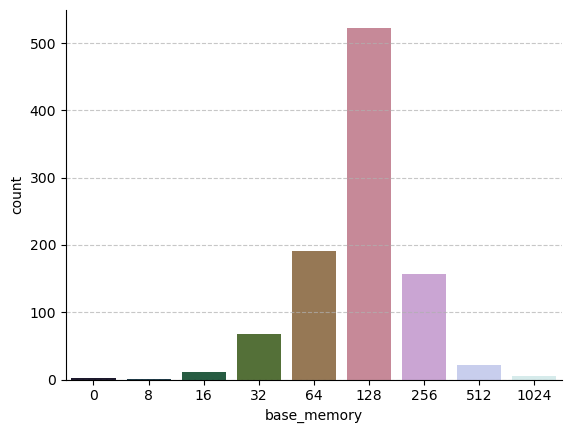

In [220]:
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
sns.barplot(df['base_memory'].value_counts(), palette = 'cubehelix')

<Axes: title={'center': 'Common Base Memory'}, xlabel='base_memory', ylabel='Density'>

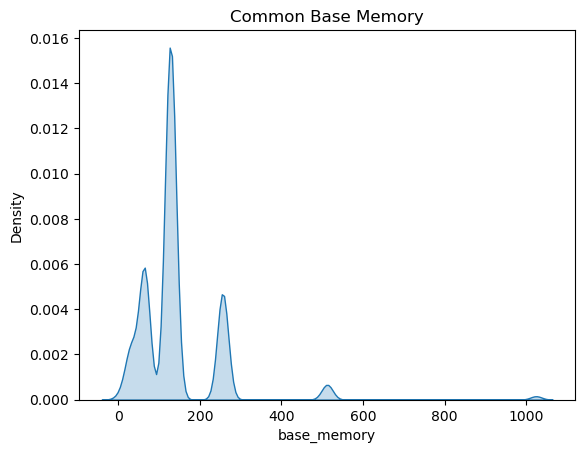

In [221]:
plt.title("Common Base Memory")
sns.kdeplot(df['base_memory'], fill=True, bw_adjust=0.5)

<Axes: ylabel='count'>

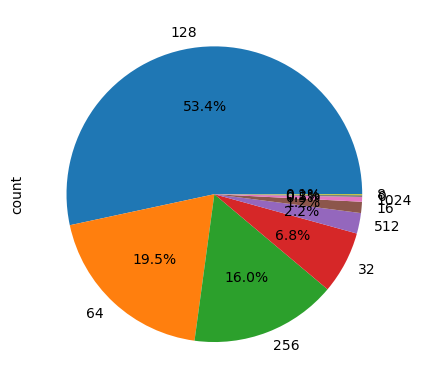

In [222]:
df['base_memory'].value_counts().plot(kind='pie',autopct="%0.1f%%")

#### **battery_capacity**

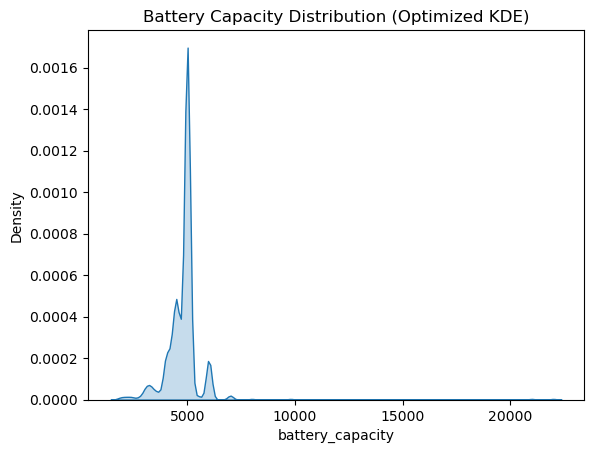

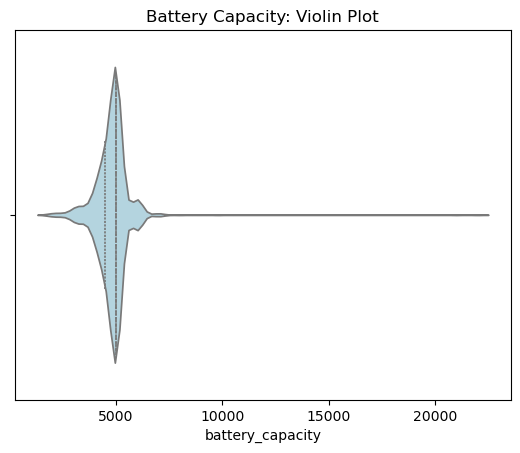

In [224]:
sns.kdeplot(df['battery_capacity'], fill=True, bw_adjust=0.5)
plt.title("Battery Capacity Distribution (Optimized KDE)")
plt.show()

sns.violinplot(x=df['battery_capacity'], inner="quartile", color="lightblue")
plt.title("Battery Capacity: Violin Plot")
plt.show()

#### **fast_charging**

C:\Users\Nihal\AppData\Local\Temp\ipykernel_10036\2500060232.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=processor_speed_counts.index,


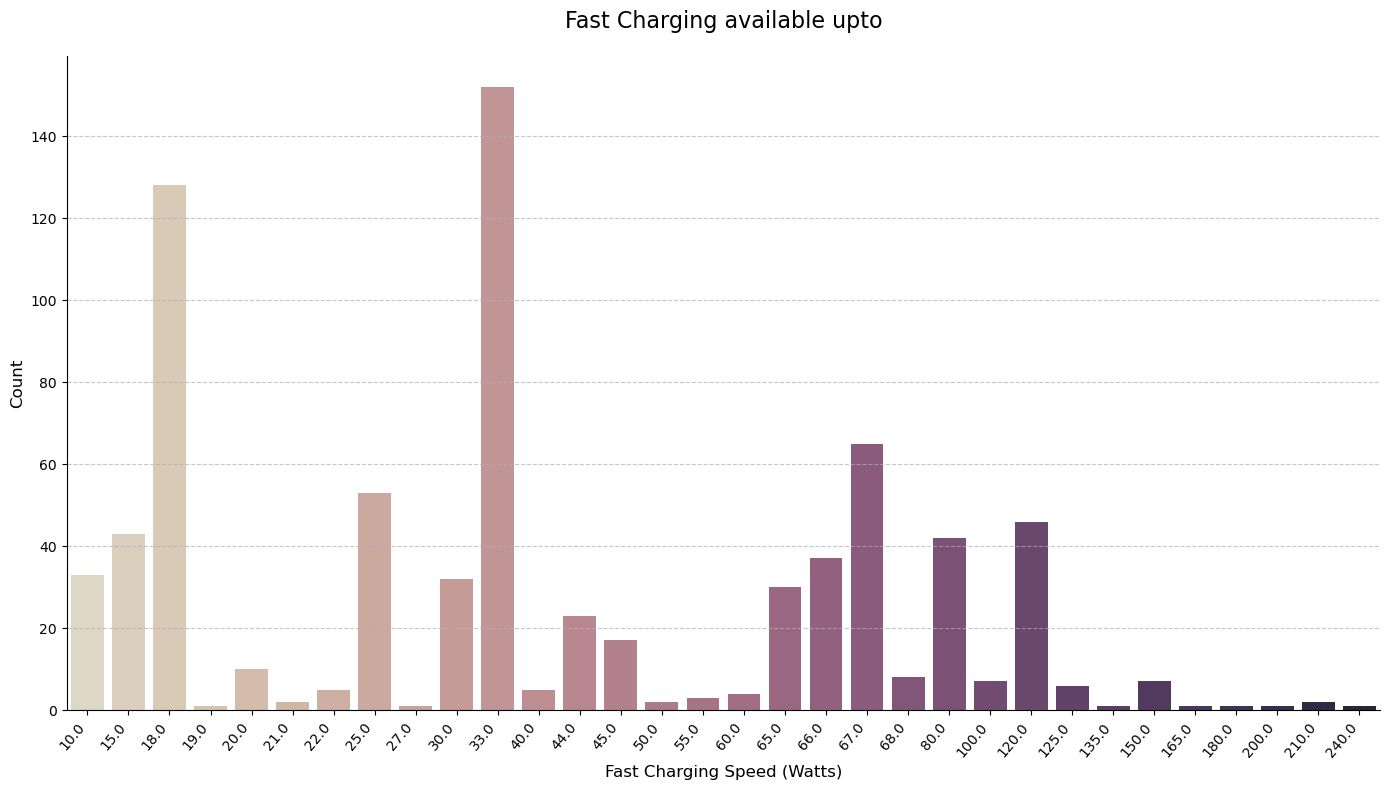

In [226]:
plt.figure(figsize=(14, 8))

processor_speed_counts = df['fast_charging'].value_counts()

sns.barplot(x=processor_speed_counts.index,
            y=processor_speed_counts.values,
            palette='ch:s=-.2,r=.6')

plt.title("Fast Charging available upto", fontsize=16, pad=20)
plt.xlabel("Fast Charging Speed (Watts)", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.xticks(rotation=50, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

plt.tight_layout()
plt.show()

#### **screen_size**

C:\Users\Nihal\AppData\Local\Temp\ipykernel_10036\1021103491.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['screen_size'].value_counts(),


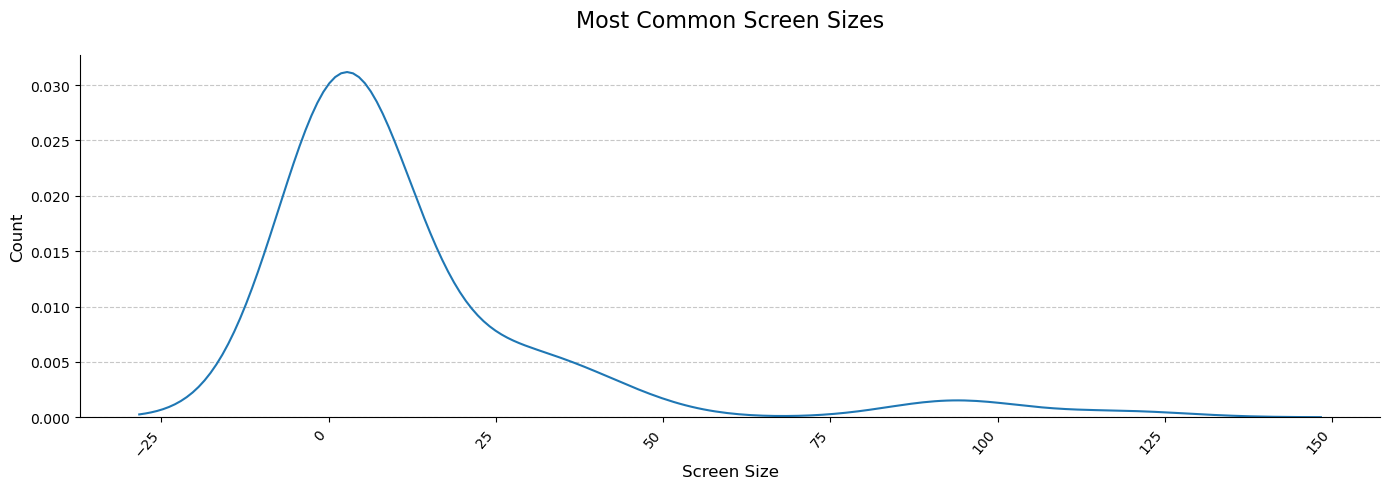

In [228]:
plt.figure(figsize=(14, 5))

sns.kdeplot(df['screen_size'].value_counts(),
            palette='ch:s=-.2,r=.6')

plt.title("Most Common Screen Sizes", fontsize=16, pad=20)
plt.xlabel("Screen Size", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.xticks(rotation=50, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

plt.tight_layout()
plt.show()

#### **refresh_rate**

C:\Users\Nihal\AppData\Local\Temp\ipykernel_10036\2855844655.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['refresh_rate'].value_counts(), palette='ch:s=-.2,r=.6')


<Axes: title={'center': 'Most Common Refresh Rates in Devices'}, xlabel='refresh_rate', ylabel='count'>

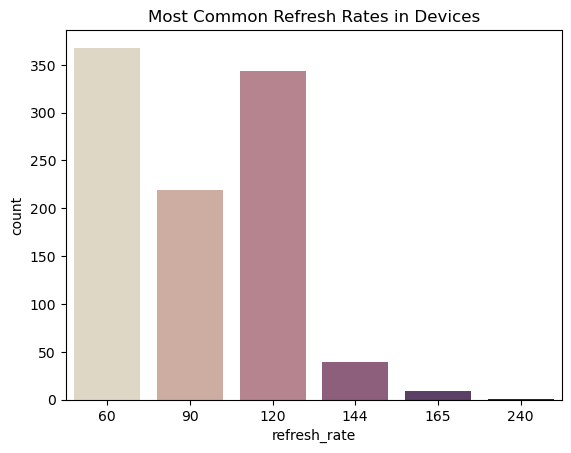

In [230]:
plt.title("Most Common Refresh Rates in Devices")
sns.barplot(df['refresh_rate'].value_counts(), palette='ch:s=-.2,r=.6')

#### **num_rear_cam**

C:\Users\Nihal\AppData\Local\Temp\ipykernel_10036\476628576.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['num_rear_cam'].value_counts(), palette='ch:s=-.2,r=.6')


<Axes: title={'center': 'Number of Rear Cameras in Most Devices'}, xlabel='Rear Cams', ylabel='count'>

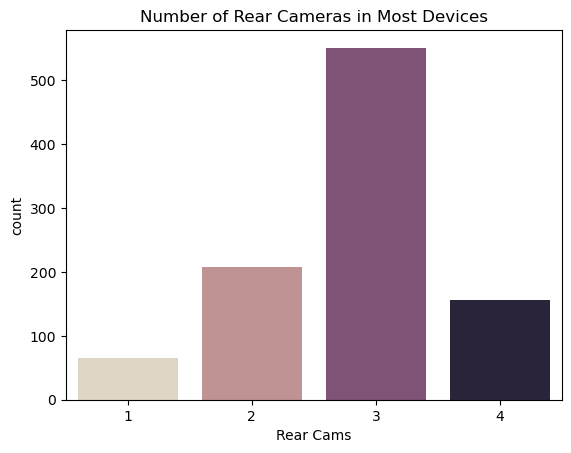

In [232]:
plt.title("Number of Rear Cameras in Most Devices")
plt.xlabel("Rear Cams")
sns.barplot(df['num_rear_cam'].value_counts(), palette='ch:s=-.2,r=.6')

#### **num_front_cam**

C:\Users\Nihal\AppData\Local\Temp\ipykernel_10036\932988221.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['num_front_cam'].value_counts(), palette='Blues')


<Axes: title={'center': 'Number of Front Cameras in Most Devices'}, xlabel='Rear Cams', ylabel='count'>

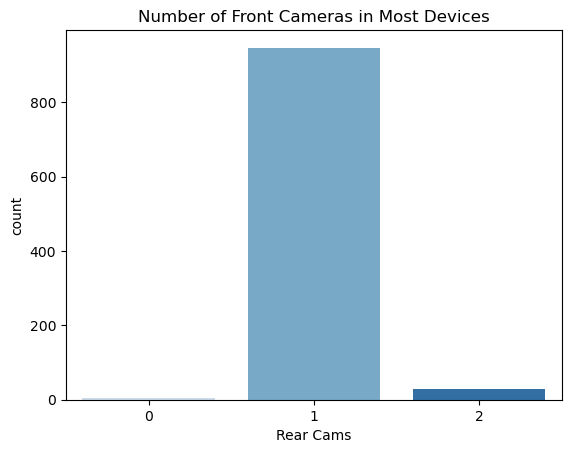

In [234]:
plt.title("Number of Front Cameras in Most Devices")
plt.xlabel("Rear Cams")
sns.barplot(df['num_front_cam'].value_counts(), palette='Blues')

#### **extended_memory**

C:\Users\Nihal\AppData\Local\Temp\ipykernel_10036\4030608490.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=processor_speed_counts.index,


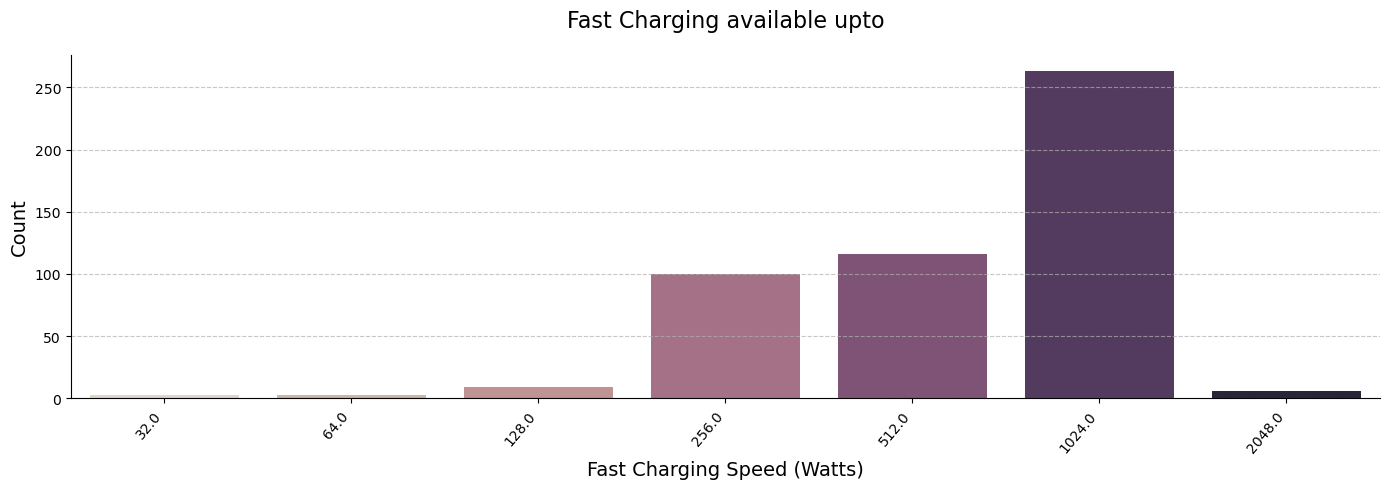

In [236]:
plt.figure(figsize=(14, 5))

processor_speed_counts = df['extended_memory'].value_counts()

sns.barplot(x=processor_speed_counts.index,
            y=processor_speed_counts.values,
            palette='ch:s=-.2,r=.6')

plt.title("Fast Charging available upto", fontsize=16, pad=20)
plt.xlabel("Fast Charging Speed (Watts)", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.xticks(rotation=50, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

plt.tight_layout()
plt.show()

#### **primary_camera_rear**

In [238]:
df[df['primary_camera_rear'] == 'Foldable'] = np.nan

C:\Users\Nihal\AppData\Local\Temp\ipykernel_10036\2787776112.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df[df['primary_camera_rear'] == 'Foldable'] = np.nan
C:\Users\Nihal\AppData\Local\Temp\ipykernel_10036\2787776112.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df[df['primary_camera_rear'] == 'Foldable'] = np.nan
C:\Users\Nihal\AppData\Local\Temp\ipykernel_10036\2787776112.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df[df['primary_camera_rear'

In [239]:
df['primary_camera_rear'] = df['primary_camera_rear'].astype('float')

<Axes: xlabel='primary_camera_rear', ylabel='Density'>

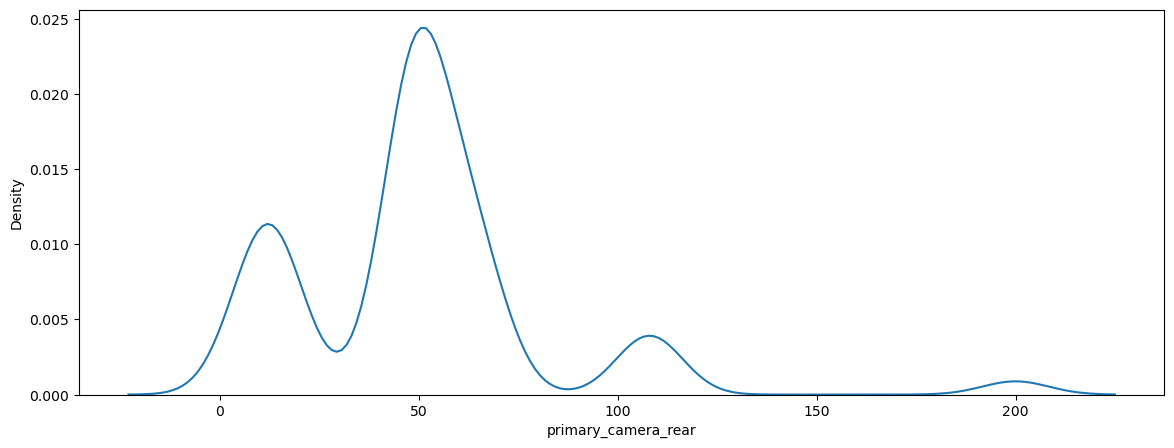

In [240]:
plt.figure(figsize=(14, 5))
sns.kdeplot(data = df, x = 'primary_camera_rear')

#### **primary_camera_front**

<Axes: xlabel='primary_camera_front', ylabel='Density'>

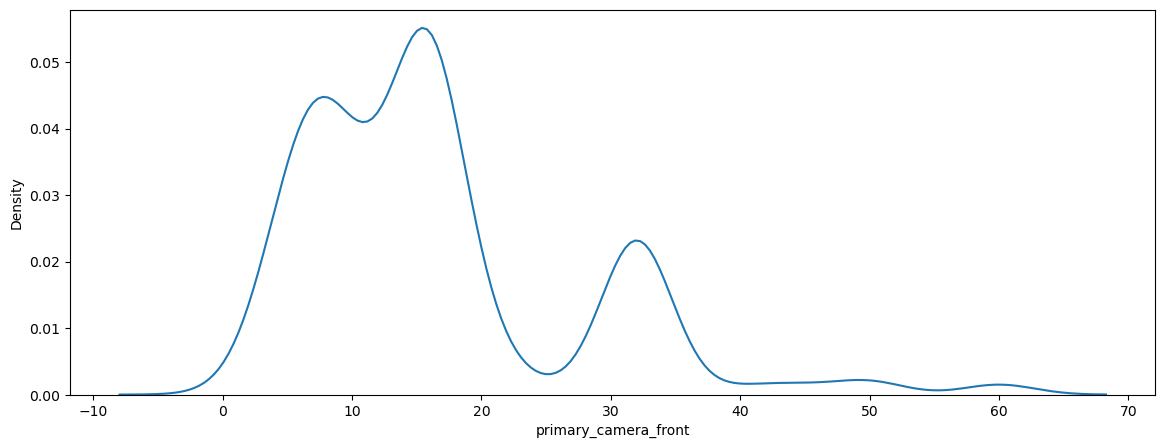

In [242]:
plt.figure(figsize=(14, 5))
sns.kdeplot(data = df, x = 'primary_camera_front')

#### **num_cores**

C:\Users\Nihal\AppData\Local\Temp\ipykernel_10036\3192112264.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['num_cores'].value_counts(), palette='ch:s=-.2,r=.6')


<Axes: title={'center': 'Number of Cores in Most Processors'}, xlabel='Cores', ylabel='count'>

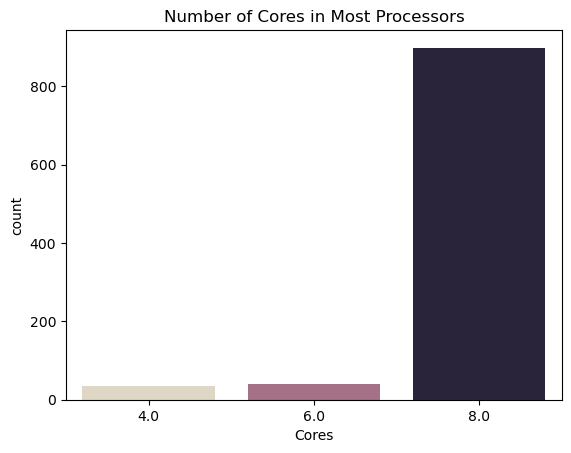

In [244]:
plt.title("Number of Cores in Most Processors")
plt.xlabel("Cores")
sns.barplot(df['num_cores'].value_counts(), palette='ch:s=-.2,r=.6')

### **Boolean Columns - Univariate Analysis**

#### **has_5g**

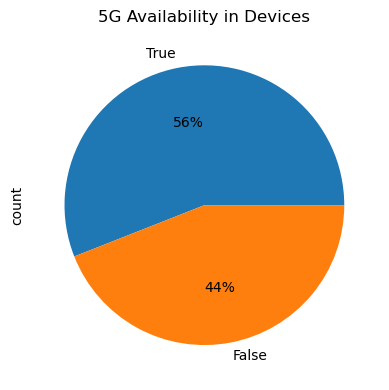

In [247]:
plt.figure(figsize=(4, 4))

df['has_5g'].value_counts().plot(kind='pie', autopct = '%0.f%%')

plt.title("5G Availability in Devices", fontsize=12)
plt.tight_layout()
plt.show()

#### **has_nfc**

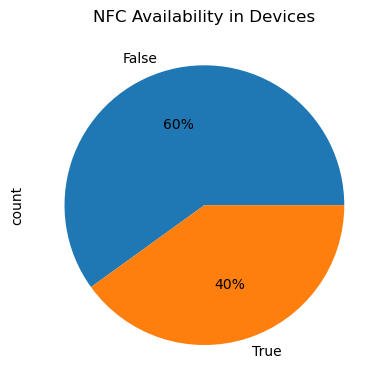

In [249]:
plt.figure(figsize=(4, 4))

df['has_nfc'].value_counts().plot(kind='pie', autopct = '%0.f%%')

plt.title("NFC Availability in Devices", fontsize=12)
plt.tight_layout()
plt.show()

#### **has_ir_blaster**

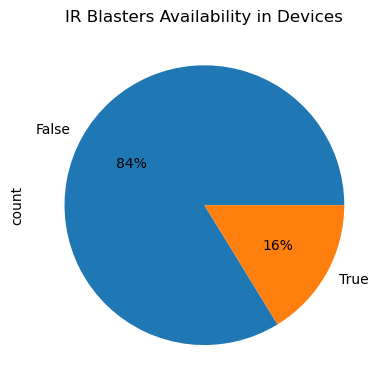

In [251]:
plt.figure(figsize=(4, 4))

df['has_ir_blaster'].value_counts().plot(kind='pie', autopct = '%0.f%%')

plt.title("IR Blasters Availability in Devices", fontsize=12)
plt.tight_layout()
plt.show()

#### **fast_charging_available**

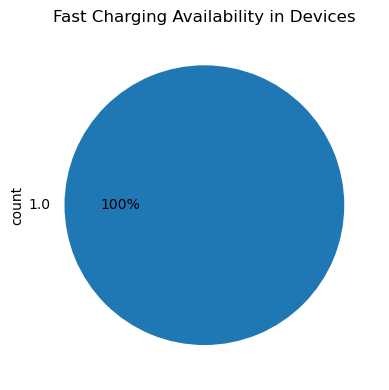

In [253]:
plt.figure(figsize=(4, 4))

df['fast_charging_available'].value_counts().plot(kind='pie', autopct = '%0.f%%')

plt.title("Fast Charging Availability in Devices", fontsize=12)
plt.tight_layout()
plt.show()

#### **extended_memory_available**

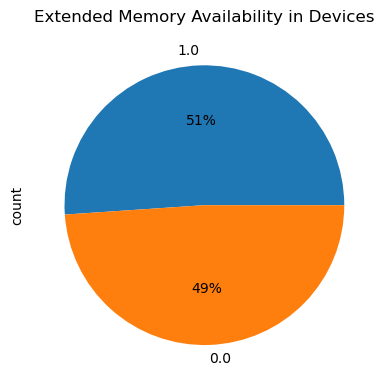

In [255]:
plt.figure(figsize=(4, 4))

df['extended_memory_available'].value_counts().plot(kind='pie', autopct = '%0.f%%')

plt.title("Extended Memory Availability in Devices", fontsize=12)
plt.tight_layout()
plt.show()

## **Bivatiate Analysis**

##### Which Mobile Phone Brand has Most IR Blaster Phones?






C:\Users\Nihal\AppData\Local\Temp\ipykernel_10036\113671733.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(tp, palette='ch:s=-.2,r=.6')


Text(0.5, 0, 'Brand')

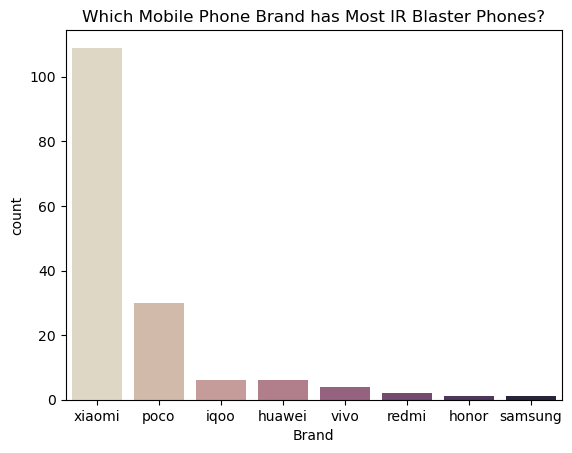

In [258]:
tp = df[df['has_ir_blaster'] == True]['brand_name'].value_counts()
sns.barplot(tp, palette='ch:s=-.2,r=.6')
plt.title("Which Mobile Phone Brand has Most IR Blaster Phones?")
plt.xlabel('Brand')

##### Total Number of Camras in Mobile Phones

<Axes: ylabel='count'>

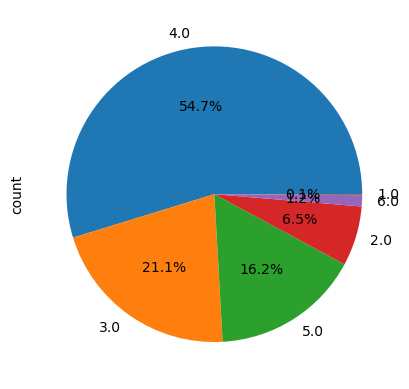

In [260]:
(df['num_rear_cam'] + df['num_front_cam']).value_counts().plot(kind='pie',autopct="%0.1f%%")

##### Price by Phones Brands

In [367]:
import plotly.express as px

import plotly.io as pio
pio.renderers.default = "iframe"

fig.update_layout(width=1200, height=1000)

brand_price = df.groupby('brand_name')['price'].median().reset_index()

fig = px.bar(brand_price,
             x='brand_name',
             y='price',
             title="Median Price by Brand",
             labels={'price': 'Median Price', 'brand_name': 'Brand Name'},
             text_auto=True,
             color='price',
             color_continuous_scale='Viridis')

fig.update_layout(
    xaxis_title="Brand Name",
    yaxis_title="Median Price",
    xaxis_tickangle=-45,
    template='plotly_white',
    hovermode='x unified',
    coloraxis_showscale=False
)

fig.show()

##### Brand That has Atleast 10 Different Modles

In [264]:
x = df.groupby('brand_name').size()

In [265]:
temp_df = df[df['brand_name'].isin(x[x > 10].index)]

C:\Users\Nihal\AppData\Local\Temp\ipykernel_10036\1792581043.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




[]

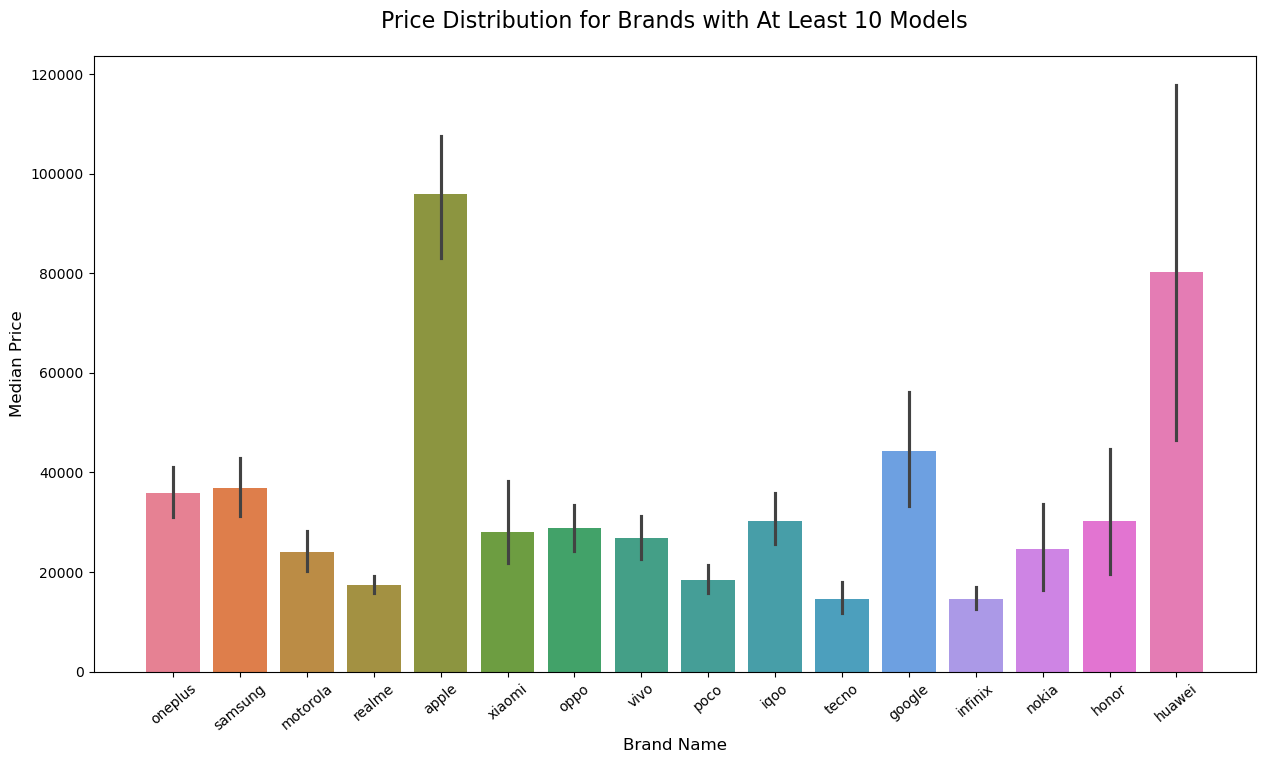

In [266]:
plt.figure(figsize=(15,8))
sns.barplot(data=temp_df,x='brand_name',y='price', palette='husl')

plt.title("Price Distribution for Brands with At Least 10 Models", fontsize=16, pad=20)
plt.xlabel("Brand Name", fontsize=12)
plt.ylabel("Median Price", fontsize=12)

plt.xticks(rotation=40)
plt.plot()

##### Is there is any correlation between price and rating

In [365]:
import plotly.express as px

import plotly.io as pio
pio.renderers.default = "iframe"

fig.update_layout(width=1200, height=1000)

fig = px.scatter(df, x='price', y='rating',
                 title="Price vs Rating",
                 labels={'rating': 'Rating', 'price': 'Price (USD)'},
                 color_continuous_scale='husl')

fig.show()

In [269]:
df[['price', 'rating']].corr()

,price,rating
price,1.000000,0.283504
rating,0.283504,1.000000



###### **Insight**:

> This plot indicates the week positive correlation between the price and the rating. It mainly means that the price is not a strong predictor of rating and there is no visible trend.

> It mainly telling us that the most rated phones are in the 0 to 100000 range and all the phones are rated between the range of 60 to 90.



###### **Conclusion:**

> Cheaper phones still provide the higher level of satisfaction which intern lead to higher ratings for those phones.



---






##### Price Difference if we have ( 5g, nfc, ir blaster )

C:\Users\Nihal\AppData\Local\Temp\ipykernel_10036\1495815117.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='has_5g', ylabel='price'>

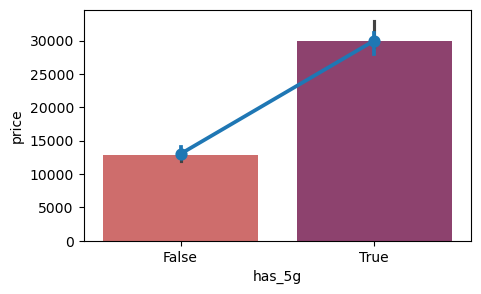

In [272]:
plt.figure( figsize = (5, 3))
sns.barplot(data = df, y = 'price', x = 'has_5g', estimator=np.median, palette = 'flare')

sns.pointplot(data=temp_df,x='has_5g',y='price',estimator=np.median)

C:\Users\Nihal\AppData\Local\Temp\ipykernel_10036\2690793296.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='has_ir_blaster', ylabel='price'>

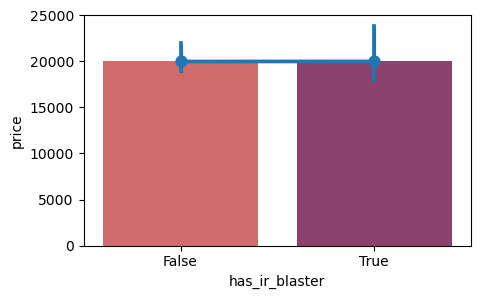

In [273]:
plt.figure( figsize = (5, 3))
sns.barplot(data = df, y = 'price', x = 'has_ir_blaster', estimator=np.median, palette = 'flare')

sns.pointplot(data=temp_df,x='has_ir_blaster',y='price',estimator=np.median)

C:\Users\Nihal\AppData\Local\Temp\ipykernel_10036\3138322424.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='has_nfc', ylabel='price'>

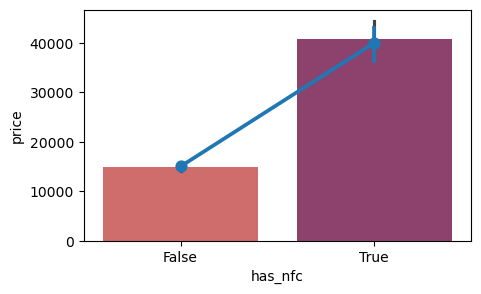

In [274]:
plt.figure( figsize = (5, 3))
sns.barplot(data = df, y = 'price', x = 'has_nfc', estimator=np.median, palette = 'flare')

sns.pointplot(data=temp_df,x='has_nfc',y='price',estimator=np.median)

##### Price difference between the Prcessor Brands

C:\Users\Nihal\AppData\Local\Temp\ipykernel_10036\3319274542.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='processor_brand', ylabel='price'>

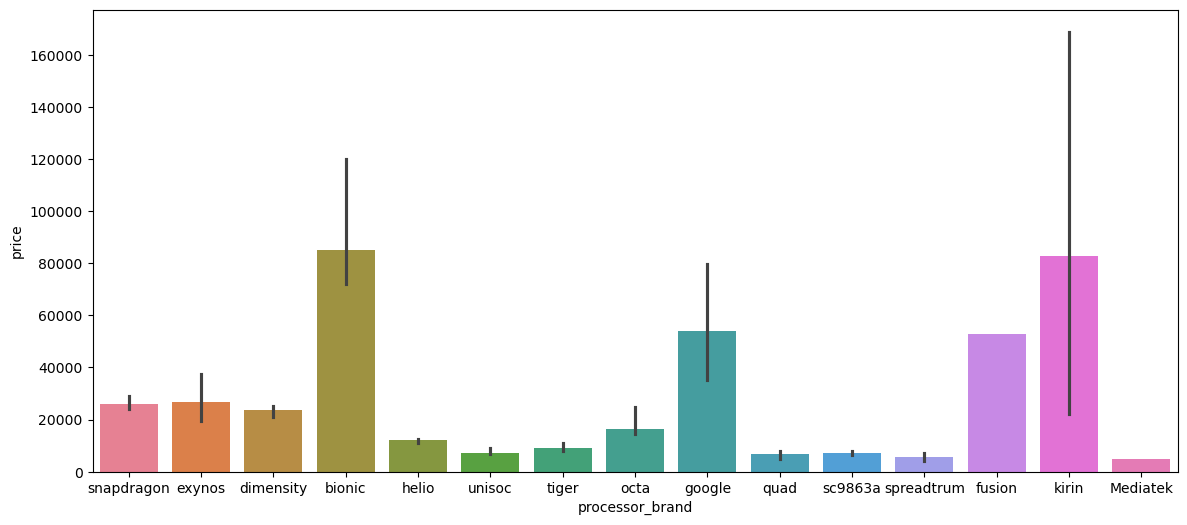

In [276]:
plt.figure(figsize = (14, 6))
sns.barplot(data = df, x = 'processor_brand', y = 'price', palette = 'husl', estimator=np.median)

##### Is there is any correlation between the processor speed and processor brand?

<Axes: xlabel='processor_brand', ylabel='processor_speed'>

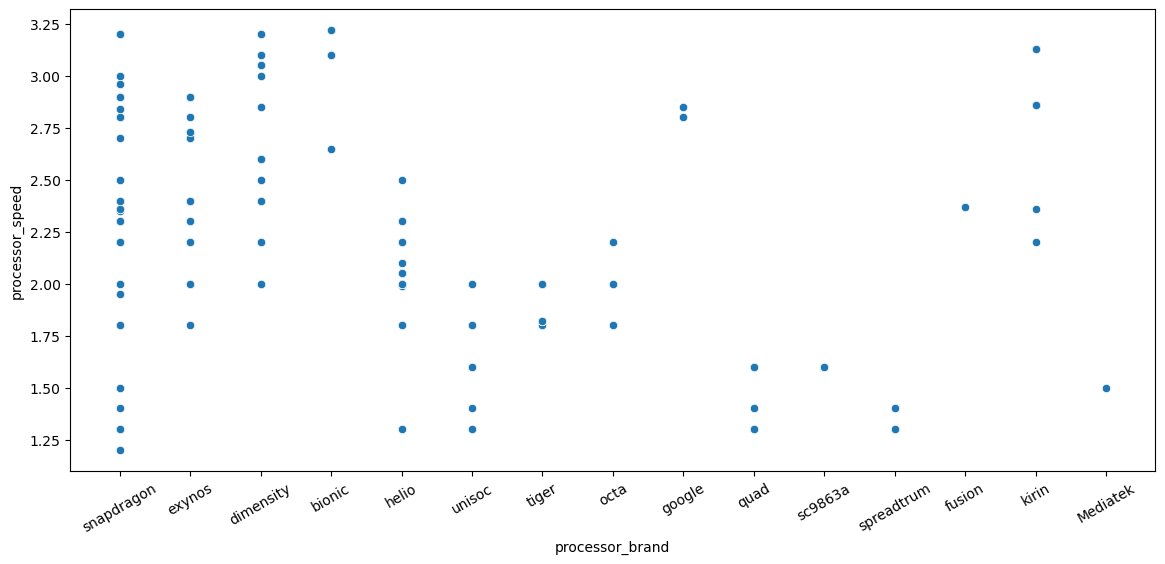

In [278]:
plt.figure( figsize = (14, 6))
plt.xticks(rotation=30)
sns.scatterplot(data = df, y = 'processor_speed', x = 'processor_brand')

##### Is there is any price difference if we have different cores?

C:\Users\Nihal\AppData\Local\Temp\ipykernel_10036\3753713263.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='num_cores', ylabel='price'>

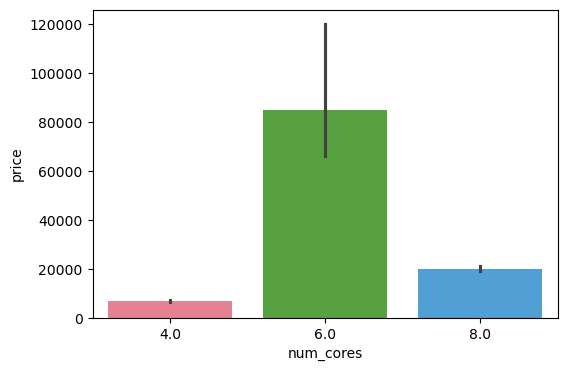

In [280]:
plt.figure(figsize = (6, 4))
sns.barplot(data = df, x = 'num_cores', y = 'price', palette = 'husl', estimator=np.median)

##### The most used cores in different os

In [282]:
pd.crosstab(df['num_cores'], df['os'])

os,android,ios,other
num_cores,,,
4.0,33,1,2
6.0,0,39,0
8.0,875,1,22


##### Is there a correlation between the price and processor_speed?

In [363]:
import plotly.express as px

import plotly.io as pio
pio.renderers.default = "iframe"

fig.update_layout(width=1200, height=1000)

fig = px.scatter(df, x='processor_speed', y='price',
                 title="Processor Speed vs Price",
                 labels={'processor_speed': 'Processor Speed (GHz)', 'price': 'Price (USD)'},
                 color_continuous_scale='husl')

fig.show()

##### Is there a correlation between the price and screen_size?

In [361]:
import plotly.express as px

import plotly.io as pio
pio.renderers.default = "iframe"

fig.update_layout(width=1200, height=1000)

fig = px.scatter(df, x='screen_size', y='price',
                 title="Screen Size vs Price",
                 labels={'processor_speed': 'Processor Speed (GHz)', 'price': 'Price (USD)'},
                 color_continuous_scale='husl')

fig.show()

##### What is the correlation between rating and other columns?

In [288]:
df_numeric = df.select_dtypes(include=['number'])

df_numeric.corr()['rating']

price                        0.283504
rating                       1.000000
processor_core               0.199741
processor_speed              0.628446
ram_capacity                 0.542422
base_memory                  0.482552
battery_capacity            -0.015581
fast_charging                0.527613
fast_charging_available           NaN
screen_size                  0.298272
refresh_rate                 0.610795
num_rear_cam                 0.515531
num_front_cam                0.131480
extended_memory              0.346761
extended_memory_available   -0.343502
primary_camera_rear          0.565831
primary_camera_front         0.579465
num_cores                    0.199741
Name: rating, dtype: float64

##### What is the correlation between price and other columns?

In [290]:
df_numeric = df.select_dtypes(include=['number'])

df_numeric.corr()['price']

price                        1.000000
rating                       0.283504
processor_core              -0.049122
processor_speed              0.472361
ram_capacity                 0.292385
base_memory                  0.555314
battery_capacity            -0.159804
fast_charging                0.276786
fast_charging_available           NaN
screen_size                  0.110750
refresh_rate                 0.242920
num_rear_cam                 0.127422
num_front_cam                0.066334
extended_memory              0.091945
extended_memory_available   -0.356815
primary_camera_rear          0.100680
primary_camera_front         0.177243
num_cores                   -0.049122
Name: price, dtype: float64

##### Correlation between the processor_brand and resolution

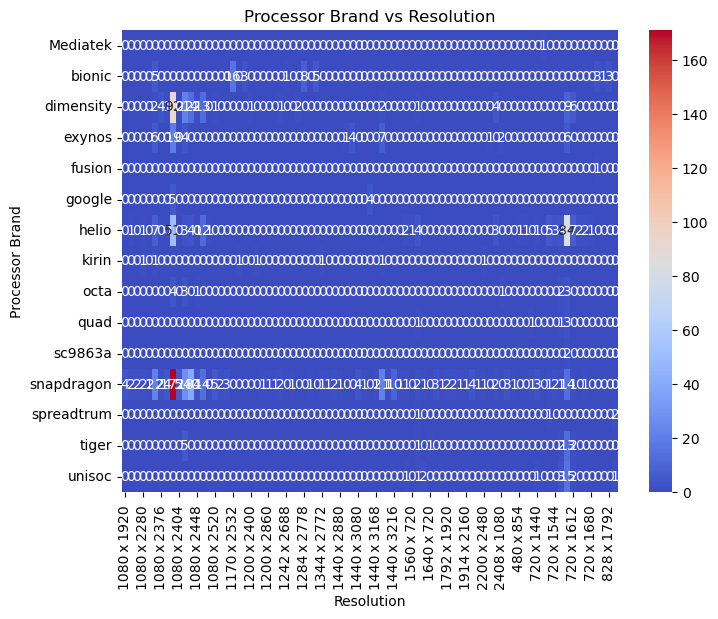

In [292]:
contingency_table = pd.crosstab(df['processor_brand'], df['resolution'])

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap='coolwarm', annot=True, fmt='d')

plt.xlabel('Resolution')
plt.ylabel('Processor Brand')
plt.title('Processor Brand vs Resolution')

plt.show()

## **Multivariate Analysis**

In [294]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,processor_core,processor_speed,ram_capacity,base_memory,battery_capacity,fast_charging,fast_charging_available,screen_size,resolution,refresh_rate,num_rear_cam,num_front_cam,extended_memory,extended_memory_available,os,primary_camera_rear,primary_camera_front,num_cores
0,oneplus,OnePlus 11 5G,54999.0,89.0,True,True,False,snapdragon,8.0,3.2,12.0,256.0,5000.0,100.0,1.0,6.70,1440 x 3216,120.0,3.0,1.0,NaN,0.0,android,50.0,16.0,8.0
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989.0,81.0,True,False,False,snapdragon,8.0,2.2,6.0,128.0,5000.0,33.0,1.0,6.59,1080 x 2412,120.0,3.0,1.0,1024.0,1.0,android,64.0,16.0,8.0
2,samsung,Samsung Galaxy A14 5G,16499.0,75.0,True,False,False,exynos,8.0,2.4,4.0,64.0,5000.0,15.0,1.0,6.60,1080 x 2408,90.0,3.0,1.0,1024.0,1.0,android,50.0,13.0,8.0
3,motorola,Motorola Moto G62 5G,14999.0,81.0,True,False,False,snapdragon,8.0,2.2,6.0,128.0,5000.0,NaN,1.0,6.55,1080 x 2400,120.0,3.0,1.0,1024.0,1.0,android,50.0,16.0,8.0
4,realme,Realme 10 Pro Plus,24999.0,82.0,True,False,False,dimensity,8.0,2.6,6.0,128.0,5000.0,67.0,1.0,6.70,1080 x 2412,120.0,3.0,1.0,NaN,0.0,android,108.0,16.0,8.0


##### A pair plot shows scatter plots between numerical variables and helps identify correlations, clusters, and patterns.

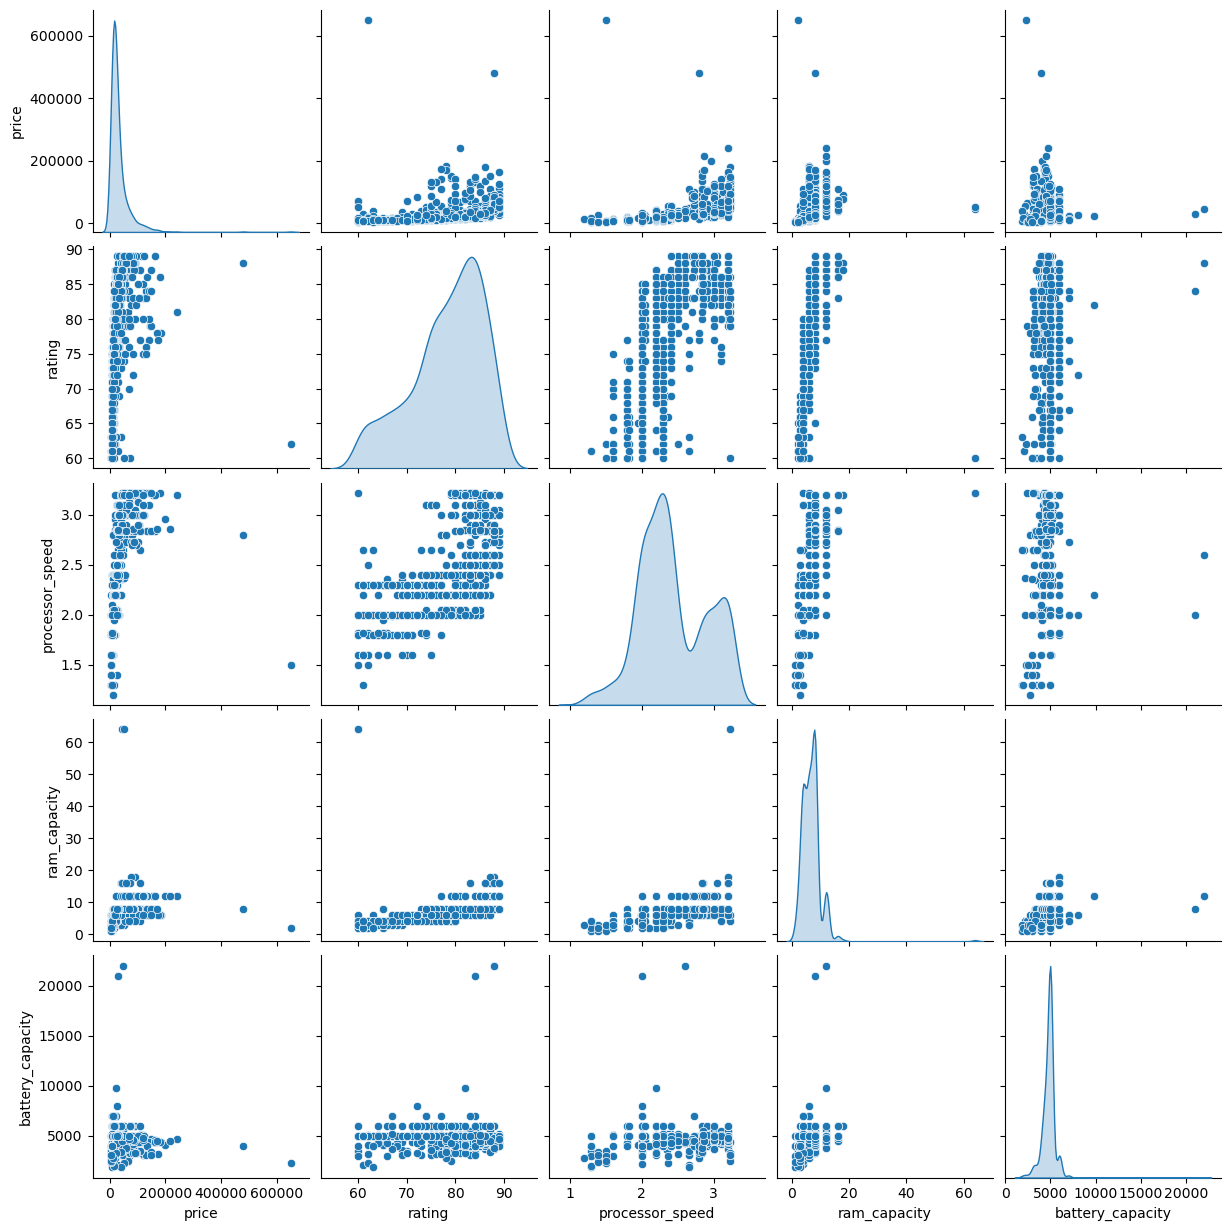

In [296]:
sns.pairplot(df[['price', 'rating', 'processor_speed', 'ram_capacity', 'battery_capacity']], diag_kind='kde')
plt.show()

##### How strongly numerical features are related to each other

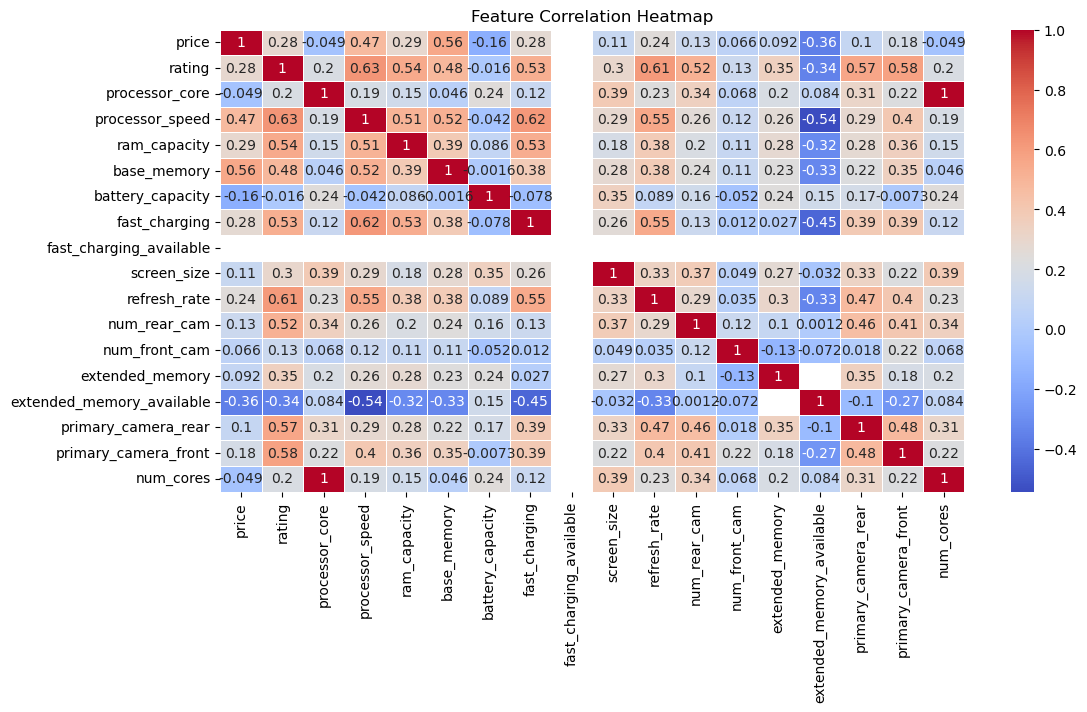

In [298]:
plt.figure(figsize=(12, 6))
df_365 = df.select_dtypes(include=['number'])
sns.heatmap(df_365.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

##### Comparing brands based on multiple specs

In [359]:
import plotly.io as pio
pio.renderers.default = "iframe"

fig.update_layout(width=1200, height=1000)

fig = px.bar(df,
             x='brand_name',
             y=['ram_capacity', 'battery_capacity', 'price'],
             barmode='group',
             title="Brand-wise Comparison",
             labels={'value': 'Specs', 'brand_name': 'Brand'},
             color_discrete_map={'ram_capacity': 'yellow', 'battery_capacity': 'black', 'price': 'purple'})

fig.update_layout(xaxis_tickangle=-45)
fig.show()

##### 3D Scatter Plot (Price, RAM, and Rating)

In [357]:
import plotly.io as pio
pio.renderers.default = "iframe"

fig.update_layout(width=1200, height=1000)

fig = px.scatter_3d(df, x='price', y='ram_capacity', z='rating', color='brand_name',
                     title="3D Scatter Plot: Price vs RAM vs Rating")
fig.show()

##### RAM size impacts price

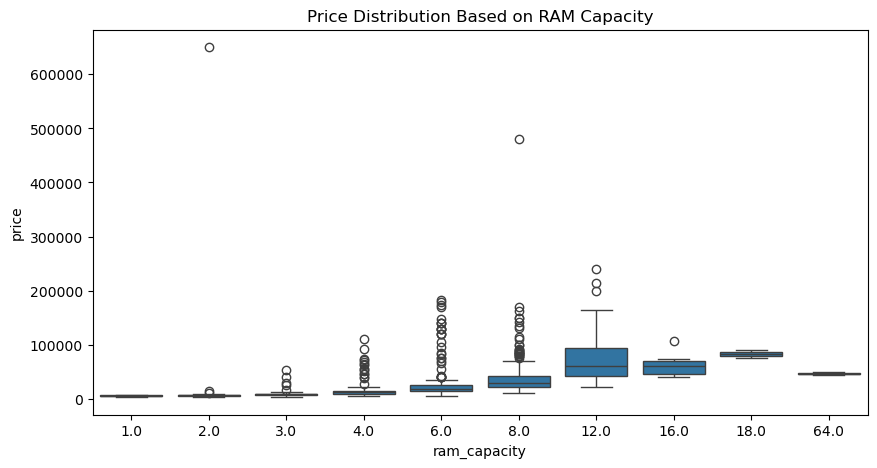

In [304]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='ram_capacity', y='price')
plt.title("Price Distribution Based on RAM Capacity")
plt.show()

##### Compares multiple features at once for selected models

In [355]:
import plotly.graph_objects as go
selected_models = df[df['model'].isin(['OnePlus 11 5G', 'Samsung Galaxy A14 5G', 'Realme 10 Pro Plus'])]

import plotly.io as pio
pio.renderers.default = "iframe"

fig.update_layout(width=1200, height=1000)

fig = go.Figure()
for _, row in selected_models.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=[row['price'], row['rating'], row['ram_capacity'], row['battery_capacity']],
        theta=['Price', 'Rating', 'RAM', 'Battery'],
        fill='toself',
        name=row['model']
    ))

fig.update_layout(title="Feature Comparison of Selected Models", polar=dict(radialaxis=dict(visible=True)))
fig.show()

##### Bubble Chart (Price vs. Rating, Bubble Size = Battery Capacity)

In [308]:
df['battery_capacity'] = df['battery_capacity'].astype(float)
df['battery_capacity'] = df['battery_capacity'].fillna(df['battery_capacity'].mean())

In [353]:
import plotly.io as pio
pio.renderers.default = "iframe"

fig.update_layout(width=1200, height=1000)

fig = px.scatter(df,
                 x='price',
                 y='rating',
                 size='battery_capacity',
                 color='brand_name',
                 title="Price vs Rating (Bubble Size = Battery Capacity)",
                 hover_data=['model', 'processor_brand'])

fig.show()

##### Sunburst Chart (Brand → Processor → RAM Distribution)

In [311]:
df['brand_name'] = df['brand_name'].fillna('Unknown')
df['processor_brand'] = df['processor_brand'].fillna('Unknown')
df['ram_capacity'] = df['ram_capacity'].fillna('Unknown')

In [351]:
import plotly.io as pio
pio.renderers.default = "iframe"

fig.update_layout(width=1500, height=1500)

fig = px.sunburst(df,
                  path=['brand_name', 'processor_brand', 'ram_capacity'],
                  values='price',
                  title="Brand-Processor-RAM Hierarchy")

fig.show()

##### Heatmap (Correlation Between Features [ 'price', 'rating', 'ram_capacity', 'battery_capacity', 'processor_speed' ])

In [337]:
from sklearn.impute import KNNImputer
import plotly.figure_factory as ff

df['ram_capacity'] = pd.to_numeric(df['ram_capacity'], errors='coerce')


imputer = KNNImputer(n_neighbors=5)
df['ram_capacity'] = imputer.fit_transform(df[['ram_capacity']])

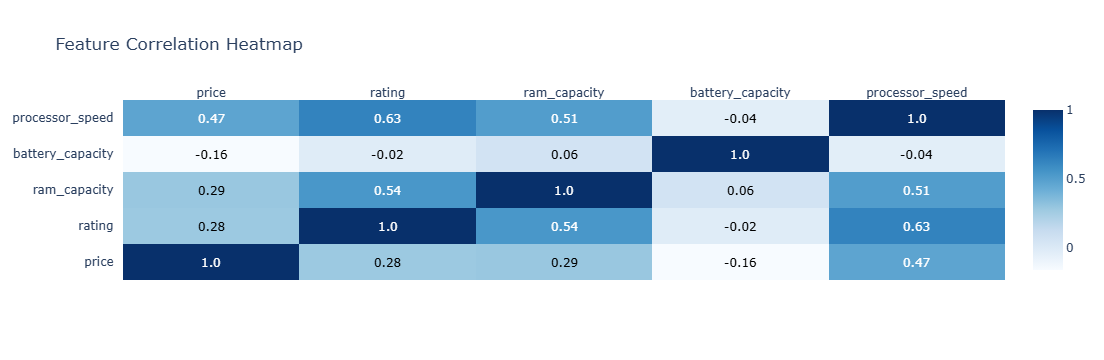

In [339]:
corr_matrix = df[['price', 'rating', 'ram_capacity', 'battery_capacity', 'processor_speed']].corr().round(2)

# Convert to heatmap
fig = ff.create_annotated_heatmap(
    z=np.array(corr_matrix),
    x=list(corr_matrix.columns),
    y=list(corr_matrix.index),
    colorscale='blues',
    showscale=True
)

fig.update_layout(title="Feature Correlation Heatmap")
fig.show()

## **The correlation of price with other columns that will help in predicting the price.**

In [369]:
find_df = df.select_dtypes(include=['number']).drop(columns = 'price')

In [371]:
find_df.sample(6)

,rating,processor_core,processor_speed,ram_capacity,base_memory,battery_capacity,fast_charging,fast_charging_available,screen_size,refresh_rate,num_rear_cam,num_front_cam,extended_memory,extended_memory_available,primary_camera_rear,primary_camera_front,num_cores
920,77.0,8.0,2.0,6.0,128.0,5000.0,33.0,1.0,6.70,60.0,3.0,1.0,NaN,0.0,50.0,16.0,8.0
784,89.0,8.0,3.0,12.0,256.0,5000.0,NaN,1.0,6.60,240.0,2.0,1.0,1024.0,1.0,47.2,12.6,8.0
211,79.0,8.0,2.4,6.0,128.0,5000.0,18.0,1.0,6.50,90.0,3.0,1.0,1024.0,1.0,48.0,16.0,8.0
423,76.0,8.0,2.3,6.0,128.0,5000.0,18.0,1.0,6.51,60.0,3.0,1.0,256.0,1.0,50.0,16.0,8.0
140,78.0,8.0,2.2,4.0,128.0,5000.0,18.0,1.0,6.58,120.0,3.0,1.0,1024.0,1.0,50.0,16.0,8.0
751,83.0,8.0,2.5,8.0,128.0,5160.0,67.0,1.0,6.67,120.0,3.0,1.0,1024.0,1.0,108.0,16.0,8.0


In [373]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
final_df = imputer.fit_transform(find_df)

find_df = pd.DataFrame(final_df,columns=find_df.columns)

find_df['price'] = df['price']

In [375]:
find_df.sample(6)

,rating,processor_core,processor_speed,ram_capacity,base_memory,battery_capacity,fast_charging,fast_charging_available,screen_size,refresh_rate,num_rear_cam,num_front_cam,extended_memory,extended_memory_available,primary_camera_rear,primary_camera_front,num_cores,price
351,62.0,8.0,2.00,4.0,32.0,4030.0,24.4,1.0,6.20,60.0,2.0,1.0,256.0,1.0,13.0,8.0,8.0,18000.0
873,83.0,8.0,2.40,8.0,128.0,5000.0,30.0,1.0,6.50,120.0,3.0,1.0,256.0,1.0,48.0,16.0,8.0,19999.0
682,84.0,6.0,3.22,6.0,256.0,4352.0,60.4,1.0,6.70,120.0,3.0,1.0,512.0,0.0,12.0,12.0,6.0,139900.0
480,80.0,8.0,2.40,6.0,128.0,5000.0,44.0,1.0,6.44,120.0,3.0,1.0,1024.0,1.0,50.0,16.0,8.0,15999.0
131,76.0,8.0,2.30,4.0,64.0,5020.0,18.0,1.0,6.67,60.0,4.0,1.0,512.0,1.0,48.0,16.0,8.0,9999.0
811,71.6,4.0,2.00,3.0,32.0,4800.0,97.8,1.0,6.80,60.0,1.0,1.0,1024.0,0.0,13.0,5.0,4.0,6999.0


In [377]:
a = find_df.corr()['price'].reset_index()

In [379]:
dfn = df.select_dtypes(include=['number'])

In [381]:
b = dfn.corr()['price'].reset_index()

In [383]:
b.merge(a,on='index')

,index,price_x,price_y
0,price,1.000000,1.000000
1,rating,0.283504,0.345392
2,processor_core,-0.049122,-0.053932
3,processor_speed,0.472361,0.485296
4,ram_capacity,0.292385,0.292385
5,base_memory,0.555314,0.555314
6,battery_capacity,-0.158089,-0.158089
7,fast_charging,0.276786,0.235522
8,fast_charging_available,NaN,NaN
9,screen_size,0.110750,0.110750


In [385]:
'''

In above case we are comparing the predicted value of price and the existing value of the price

'''

'\n\nIn above case we are comparing the predicted value of price and the existing value of the price\n\n'

## Final Data 

In [388]:
df.to_csv('smartphone_cleaned_v8.csv', index = False)

In [390]:
import pandas as pd

df = pd.read_csv("../data/processed/smartphone_cleaned_v8.csv")

In [392]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,processor_core,processor_speed,ram_capacity,base_memory,battery_capacity,fast_charging,fast_charging_available,screen_size,resolution,refresh_rate,num_rear_cam,num_front_cam,extended_memory,extended_memory_available,os,primary_camera_rear,primary_camera_front,num_cores
0,oneplus,OnePlus 11 5G,54999.0,89.0,True,True,False,snapdragon,8.0,3.2,12.0,256.0,5000.0,100.0,1.0,6.70,1440 x 3216,120.0,3.0,1.0,NaN,0.0,android,50.0,16.0,8.0
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989.0,81.0,True,False,False,snapdragon,8.0,2.2,6.0,128.0,5000.0,33.0,1.0,6.59,1080 x 2412,120.0,3.0,1.0,1024.0,1.0,android,64.0,16.0,8.0
2,samsung,Samsung Galaxy A14 5G,16499.0,75.0,True,False,False,exynos,8.0,2.4,4.0,64.0,5000.0,15.0,1.0,6.60,1080 x 2408,90.0,3.0,1.0,1024.0,1.0,android,50.0,13.0,8.0
3,motorola,Motorola Moto G62 5G,14999.0,81.0,True,False,False,snapdragon,8.0,2.2,6.0,128.0,5000.0,NaN,1.0,6.55,1080 x 2400,120.0,3.0,1.0,1024.0,1.0,android,50.0,16.0,8.0
4,realme,Realme 10 Pro Plus,24999.0,82.0,True,False,False,dimensity,8.0,2.6,6.0,128.0,5000.0,67.0,1.0,6.70,1080 x 2412,120.0,3.0,1.0,NaN,0.0,android,108.0,16.0,8.0
